### Organizational Network Analysis

This notebook contains a organizational network analysis mainly executed with the library of NetworkX and Netgraph . In detail, the ONA boils down to one concept - the relationship - by applying ONA to understand the denseness of a network in a organization.For example, which nodes are most important in various ways, which communities exist, and so forth. This network is considered as a directed and weighted network. Looking at the dataset from a graph analysis perspective:

* Each node represents a active employee in this organization.

* Each edge corresponds to the relationship/connection of two employees that belong to this network. In other words, two employees must have a email connection in order for them to be connected in the particular network.

Note: In the passive ONA, we use the revelanceScore value in MS Graph People API to determine the strength of the connection between two employees.

What is the revelanceSccore:
The relevance score of the email address. A relevance score is used as a sort key, in relation to the other returned results. A higher relevance score value corresponds to a more relevant result. Relevance is determined by the user’s communication and collaboration patterns and business relationships. -- from MS Graph.
link:https://learn.microsoft.com/en-us/graph/api/resources/scoredemailaddress?view=graph-rest-1.0 

##### Import packages

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy as sp
from netgraph import Graph
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib as matplotlib

%matplotlib inline

##### Read CSV file

In [3]:
# Reading MS graph people API data

ms_people = pd.read_csv('passive_ms_new.csv')
len(ms_people)

548

##### EDA for undestanding the MS People API Data

In [4]:
# look at the a concise summary of a DataFrame. 
# including information about the index data type, column data types, non-null values, and memory usage.

ms_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Employee ID_sender              548 non-null    int64  
 1   Employee ID_receiver            548 non-null    int64  
 2   relevanceScore                  548 non-null    float64
 3   On Site Frequency_sender        548 non-null    object 
 4   Position Title_sender           548 non-null    object 
 5   Date in service_sender          548 non-null    object 
 6   Business Unit level 1_sender    548 non-null    object 
 7   Business Unit level 2_sender    548 non-null    object 
 8   On Site Frequency_receiver      548 non-null    object 
 9   Position Title_receiver         548 non-null    object 
 10  Date in service_receiver        548 non-null    object 
 11  Business Unit level 1_receiver  548 non-null    object 
 12  Business Unit level 2_receiver  548 

In [5]:
#detect and count missing values (NaNs) in a DataFrame.

ms_people.isna().sum()

Employee ID_sender                0
Employee ID_receiver              0
relevanceScore                    0
On Site Frequency_sender          0
Position Title_sender             0
Date in service_sender            0
Business Unit level 1_sender      0
Business Unit level 2_sender      0
On Site Frequency_receiver        0
Position Title_receiver           0
Date in service_receiver          0
Business Unit level 1_receiver    0
Business Unit level 2_receiver    0
Years in service_sender           0
Years in service_receiver         0
dtype: int64

Observation:

* The dataset contains 548 rows and 15 columns(features).
* There are no missing value (NaNs) in the dataset.


Let's have a look at statistics of the datasets. First we will check for numerical values and then for categorical values.

In [6]:
# understanding the distribution and summary statistics of the relevanceScore variable

ms_people["relevanceScore"].describe()

count     548.000000
mean      532.702555
std       878.517122
min         1.000000
25%        57.750000
50%       187.500000
75%       638.000000
max      6988.000000
Name: relevanceScore, dtype: float64

In [7]:
# understanding the distribution and summary statistics of the variable of "Years in service_sender"

ms_people['Years in service_sender'].describe()

count    548.000000
mean       4.645821
std        3.658677
min        0.100000
25%        1.790000
50%        3.450000
75%        8.550000
max       12.160000
Name: Years in service_sender, dtype: float64

In [8]:
# understanding the distribution and summary statistics of the variable of "Years in service_receiver"

ms_people['Years in service_receiver'].describe()

count    548.000000
mean       5.686204
std        3.987064
min        0.100000
25%        1.975000
50%        5.480000
75%        9.380000
max       17.050000
Name: Years in service_receiver, dtype: float64

In [11]:
# understanding summary statistics of the categorical variable of "Business Unit level 2_receiver"

ms_people["Business Unit level 2_receiver"].describe()

count                       548
unique                       19
top       Engineering - Brand 2
freq                        137
Name: Business Unit level 2_receiver, dtype: object

In [12]:
# understanding summary statistics of the categorical variable of "Business Unit level 2_sender"

ms_people["Business Unit level 2_sender"].describe()


count                       548
unique                        6
top       Engineering - Brand 2
freq                        189
Name: Business Unit level 2_sender, dtype: object

In [13]:
# understanding summary statistics of the categorical variable of "On Site Frequency_receiver"

ms_people["On Site Frequency_receiver"].describe()

count        548
unique         3
top       Hybrid
freq         356
Name: On Site Frequency_receiver, dtype: object

In [14]:
# understanding summary statistics of the categorical variable of "Business Unit level 2_sender"

ms_people["On Site Frequency_sender"].describe()

count        548
unique         2
top       Hybrid
freq         348
Name: On Site Frequency_sender, dtype: object

Observations:

Connection Strength - MS Graph relevanceScore
* Average relevanceScore was 532
* Lowest value was 1.00 whereas greatest value was 6988

Years of Service in the organization
* Average employees' years of service is 4 some years

On-Site
* Approximately 60% of employees are hybrid and 40% of employees are fully remote.


##### Exploratory Data Analysis

Distribution for years of service of senders and receivers

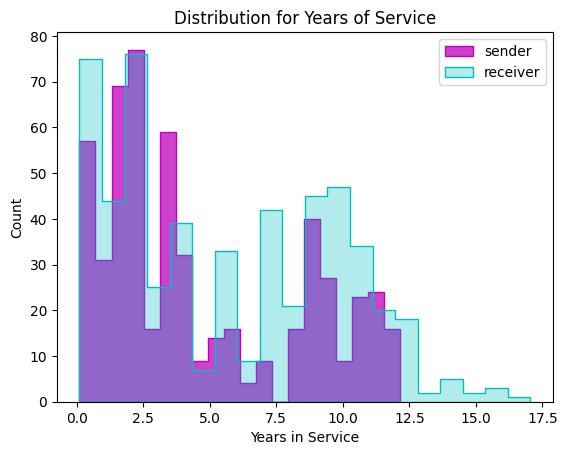

In [15]:
# construct a histogram to compare years of service between email senders and receivers

sns.histplot(x="Years in service_sender", bins=20, data= ms_people, element="step", color="m", label="sender")
sns.histplot(x="Years in service_receiver", bins=20,data=ms_people, element= "step", color="c", alpha=0.3, label="receiver")
plt.legend()
plt.title('Distribution for Years of Service')
plt.xlabel('Years in Service')
plt.show()

Conclusion: 

As we can see form histogram, email receivers seem to have wider range of year of service in the organization from 0 to 17 years. On the other hand, the years of service in sender is between 0 and 12.

##### Distribution for connection strength

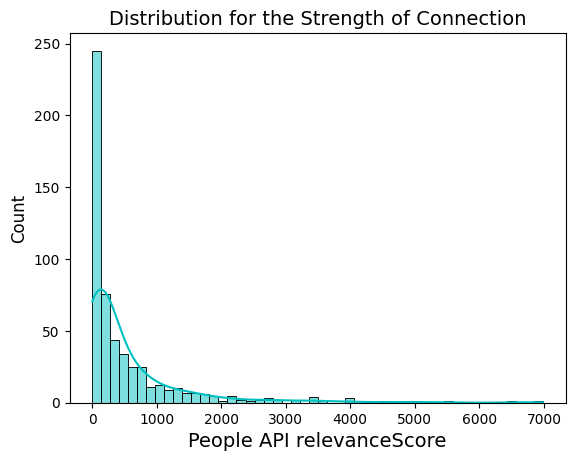

In [16]:
# Plot a histogram to see the distribution of the relevanceScore variable

sns.histplot(x="relevanceScore", data=ms_people, color= "c", alpha=0.5, kde=True)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('People API relevanceScore', fontsize = 14)
plt.title('Distribution for the Strength of Connection', fontsize = 14)
plt.show()

Conclusion:

From the histogram, we found that the distribution of relevance socre is right skewed with long tail on the right. Which indicates that majority of data values are on the left side with relevance score less than 1000, and osme larger value on the right.

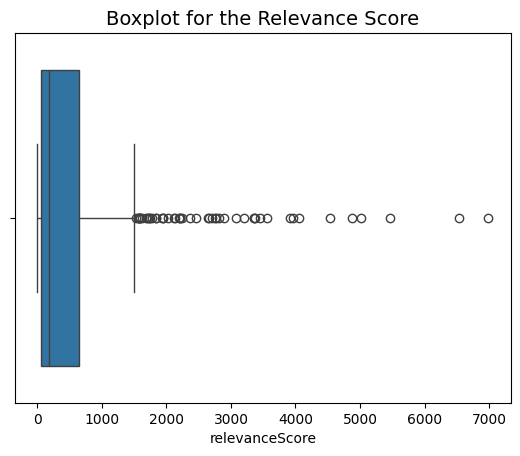

In [17]:
# plot a boxplot to check data points' spread, variability and outliers for relevanceScore variable

sns.boxplot(x=ms_people["relevanceScore"])
plt.title('Boxplot for the Relevance Score', fontsize = 14)
plt.show()

Conclusion:

The boxplot reveals that the median (50th percentile) is closer to the bottom of the box and the upper whisker is longer, the data is positively skewed (right-skewed). The plot also shows some potential outlierswhich are the points outside the whiskers with approximately relevance socre higher than 1500, indicating unusual or extreme values in the dataset.

In [18]:
# Plotting a Matrix Plot with data to see the connection strength among business units in the organization

chart = alt.Chart(ms_people).mark_rect().encode(
    y='Business Unit level 2_sender:O',
    x='Business Unit level 2_receiver:O',
    color='relevanceScore:Q'
).properties(
    title='Connection Strength Matrix Plot',
    width=200,
    height=200
).configure_title(
    fontSize=20,
    
)
chart

alt.Chart(...)

Conclusion:

The connection strength matrix plot reveals that the organization's leadership has strong connection with their business units in Brand 2, especially the relastionship with engineering and product merchandising teams.

##### Network Analysis: Part I at Organization Level

##### Visualizing the network graph

Visualization plays a central role in network analysis to help get a qualitative feel for the data.

In [19]:
# The graph is created from the ms_people dataframe of the edges:


# Graph for connection among employees
# Directed graph
CG =nx.from_pandas_edgelist(ms_people, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())

# Undirected graph
G =nx.from_pandas_edgelist(ms_people, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"] , create_using=nx.Graph())

# Graph for connection among departments
# Directed graph
DG= nx.from_pandas_edgelist(ms_people, source= "Business Unit level 2_sender", 
                            target = "Business Unit level 2_receiver", 
                            edge_attr=True, 
                            create_using=nx.DiGraph())

# Undirected graph
GG= nx.from_pandas_edgelist(ms_people, source= "Business Unit level 2_sender", 
                            target = "Business Unit level 2_receiver", 
                            edge_attr=True, 
                            create_using=nx.Graph())


##### Organization Network Graph - Connection among the Business Units

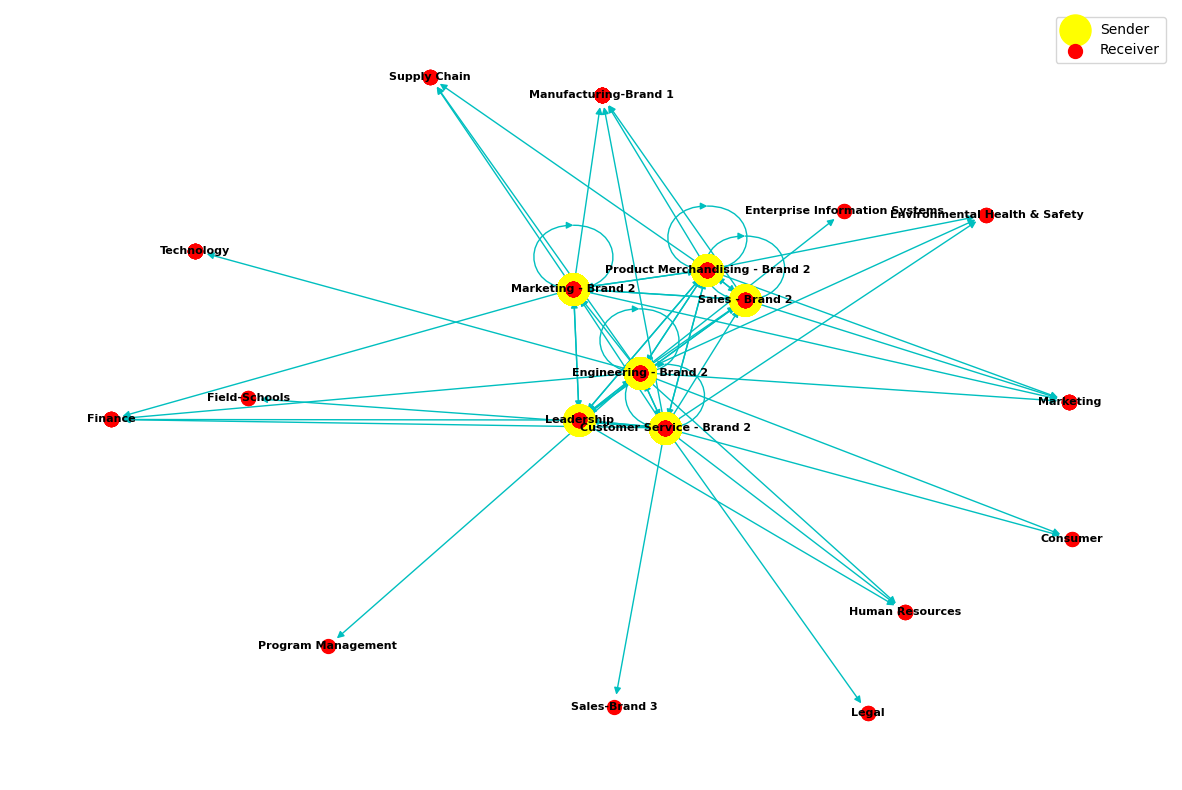

In [20]:
#Draw a graph with directed edges using a colormap and different node sizes.

# Setting layout
layout1= nx.spring_layout(DG, iterations=15, seed=1721)

# Adding nodes
yellow = list(ms_people['Business Unit level 2_sender'])
pinknodes = list(ms_people['Business Unit level 2_receiver'])
fig, ax = plt.subplots(figsize=(15, 10))
ax.axis("off")
nx.draw_networkx_nodes(DG, pos=layout1, nodelist=yellow, ax = ax, node_size = 500, 
                       node_color='yellow', label='Sender')
nx.draw_networkx_nodes(DG, pos=layout1, nodelist=pinknodes, ax = ax, node_size = 100,
                       node_color='red', label='Receiver')

nx.draw_networkx_edges(DG, pos=layout1, width=1, edge_color="c")
nx.draw_networkx_labels(DG, pos=layout1, font_size=8, font_weight='bold')
plt.legend(scatterpoints = 1)
plt.show()

Conclusion:

The network graph shows that each business unit in brand 2 organization not only has relationships within their own team but also has connections among other business units (teams).

In [21]:
# loading hr information

hr_df = pd.read_csv('passive_hr_new.csv')
hr_df.columns

Index(['Employee ID', 'On Site Frequency', 'Position Title', 'Date in service',
       'Business Unit level 1', 'Business Unit level 2'],
      dtype='object')

In [148]:
hr_df['Business Unit level 2'].unique()

array(['Engineering - Brand 2', 'Marketing', 'Marketing - Brand 2',
       'Technology', 'Legal', 'Product Merchandising - Brand 2',
       'Finance', 'Customer Service - Brand 2', 'Manufacturing-Brand 1',
       'Leadership', 'Environmental Health & Safety', 'Supply Chain',
       'Field-Schools', 'Consumer', 'Sales-Brand 3', 'Program Management',
       'Sales - Brand 2', 'Human Resources',
       'Enterprise Information Systems'], dtype=object)

In [22]:
# adding team abbreviation to hr dataframe

abr = []
for i in list(hr_df['Business Unit level 2']):
    if i == 'Customer Service - Brand 2':
        abr.append('CS_B2')
    elif i == 'Engineering - Brand 2':
        abr.append('ENG_B2')
    elif i == 'Marketing - Brand 2':
        abr.append('MKT_B2')
    elif i == 'Product Merchandising - Brand 2':
        abr.append('PM_B2')
    elif i == 'Sales - Brand 2':
         abr.append('Sales_B2')
    elif i == 'Leadership':
         abr.append('Leadership')
    elif i == 'Marketing':
         abr.append('MKT_Corp')
    elif i == 'Technology':
        abr.append('Tech_Corp')
    elif i == 'Legal':
        abr.append('Legal_Corp')
    elif i == 'Finance':
        abr.append('Finance_Corp')
    elif i == 'Supply Chain':
        abr.append('SPC_Crop')
    elif i == 'Human Resources':
        abr.append('HR_Corp')
    elif i == 'Enterprise Information Systems':
        abr.append('EIS_Corp')
    elif i == 'Field-Schools':
        abr.append('FS_B3')
    elif i == 'Sales-Brand 3':
        abr.append('Sales_B3')
    elif i == 'Manufacturing-Brand 1':
        abr.append('MF_Op')
    elif i == 'Environmental Health & Safety':
        abr.append('EnHS_Op')
    elif i == 'Program Management':
        abr.append('PrgM_Op')
    else:
        abr.append('Consumer_SHC')


hr_df['team_abr'] = abr


In [23]:
# creating dic for node attributes

attrs = {}
for i in range(len(hr_df)):
    attrs[hr_df['Employee ID'][i]] = {'Employee ID': hr_df['Employee ID'][i],
                                      'Team_L1' : hr_df['Business Unit level 1'][i],
                                      'Team_L2' : hr_df['Business Unit level 2'][i],
                                      'Abbr' : hr_df['team_abr'][i]
                                      }
    
# adding node attributes to CG

nx.set_node_attributes(CG, attrs)

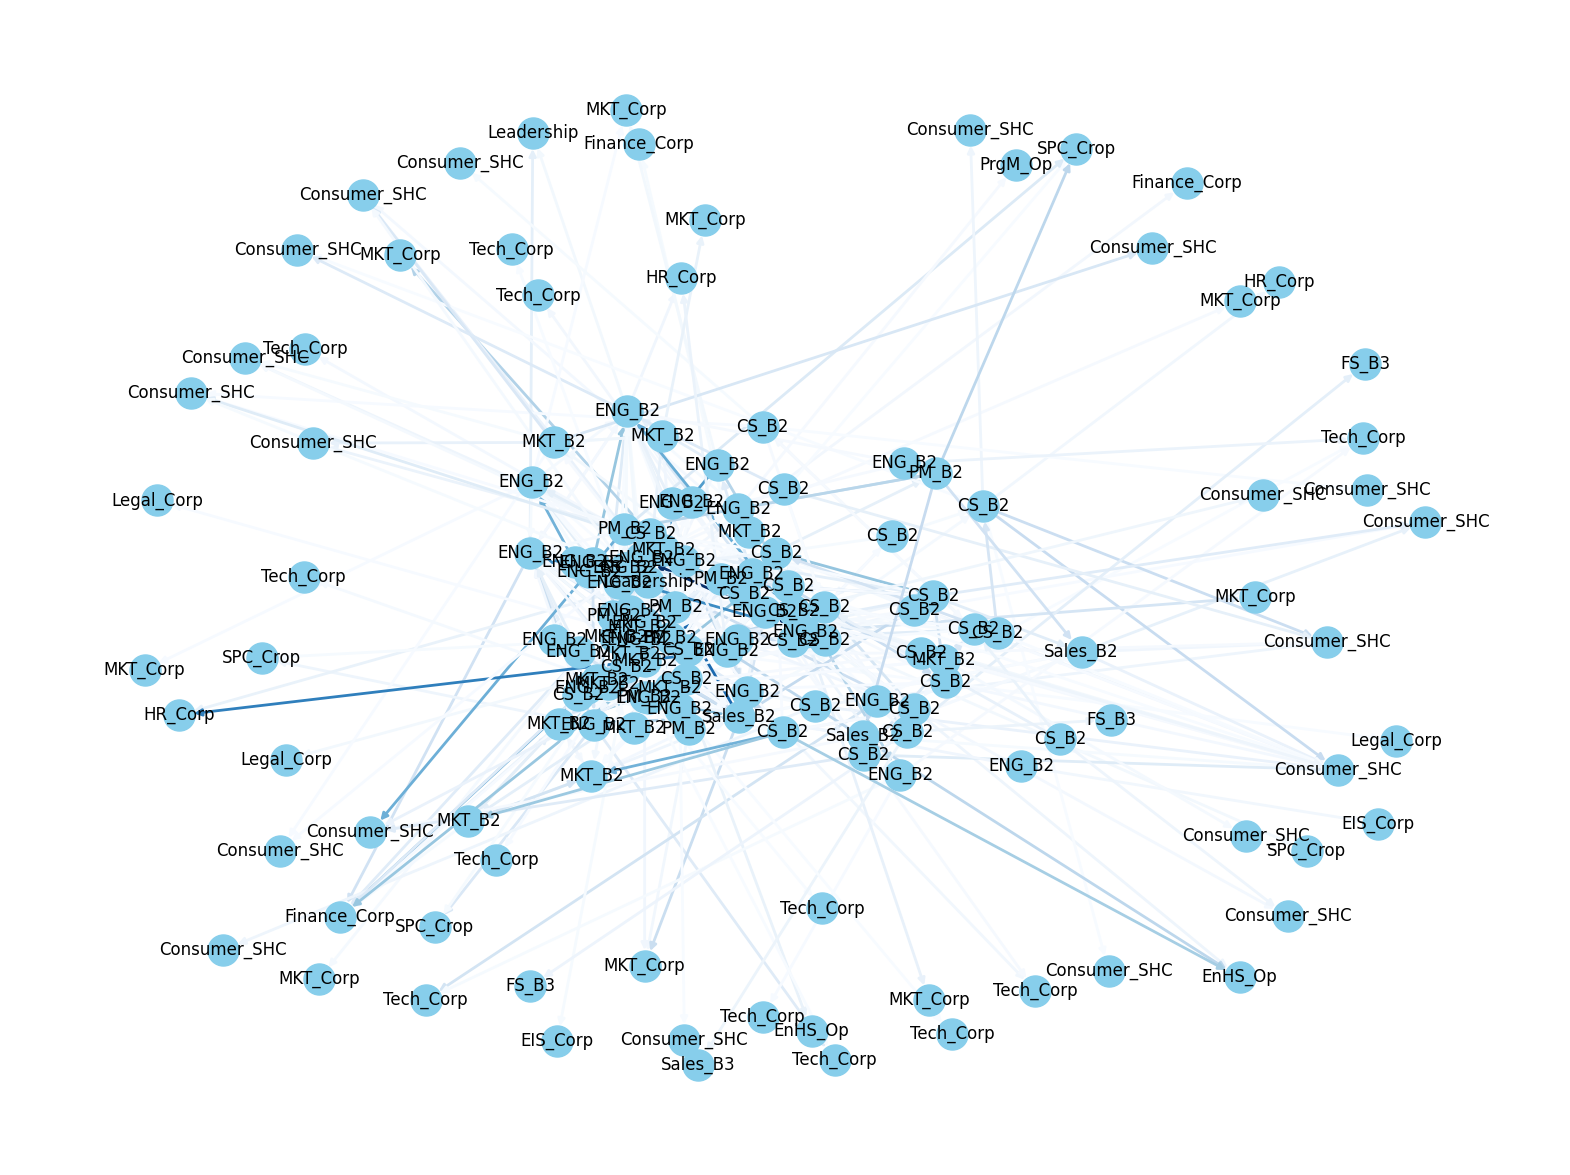

In [24]:
# plotting a network graph with abbreviation as label

abbr = nx.get_node_attributes(CG, "Abbr")
pos = nx.spring_layout(CG, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
nx.draw_networkx(CG, pos=pos, ax=ax, node_color='skyblue', node_size=500, labels = abbr,
                 edge_color=ms_people['relevanceScore'], width=2.0, edge_cmap=plt.cm.Blues)

In [25]:
# creat hr information dataframe for each team

def subset1(level2):
    sub = hr_df[hr_df['Business Unit level 2'] == str(level2)]
    return sub


def subset(level1):
    sub = hr_df[hr_df['Business Unit level 1'] == str(level1)]
    return sub

lr = subset1('Leadership')
# specify Brand 2 vp as learder
slr = lr[lr['Employee ID'] == 3040598]
seng = subset1('Engineering - Brand 2')
smt = subset1('Marketing - Brand 2')
spm = subset1('Product Merchandising - Brand 2')
ssale = subset1('Sales - Brand 2')
scs = subset1('Customer Service - Brand 2')

opera = subset('Operations')
lifet = subset('Brand 3')
corp_1 = subset('Corporate')
# exclude brand 2 enginnering and vp form corporate

corp_2 = corp_1[corp_1['Business Unit level 2'] != 'Engineering - Brand 2']
corp = corp_2[corp_2['Employee ID'] != 3040598]
shfycs = subset('Brand 1 Consumer')


In [26]:
# number of people in each business unit level 2 in the organization

hr_df['Business Unit level 2'].value_counts()

Business Unit level 2
Engineering - Brand 2              34
Customer Service - Brand 2         29
Manufacturing-Brand 1              18
Marketing - Brand 2                16
Technology                         12
Marketing                           9
Product Merchandising - Brand 2     8
Supply Chain                        4
Finance                             3
Field-Schools                       3
Legal                               3
Human Resources                     3
Sales - Brand 2                     3
Environmental Health & Safety       2
Leadership                          2
Enterprise Information Systems      2
Consumer                            2
Sales-Brand 3                       1
Program Management                  1
Name: count, dtype: int64

In [27]:
## create a dictionary that maps nodes to the community (business unit) they belong to

dic_1 = {}
for i in [seng, smt, spm, ssale, scs, slr]:
    for j in range(len(i)):
        dic_1[i['Employee ID'].iloc[j]] = i['Business Unit level 2'].iloc[j]
for i in [opera, lifet, corp, shfycs]:
    for j in range(len(i)):
        dic_1[i['Employee ID'].iloc[j]] = i['Business Unit level 1'].iloc[j]
len(dic_1)

155

In [28]:
# create a dictionary that maps colors to the business unit

colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:blue','darkred', 
          'yellow', 'tab:pink', 'tab:gray', 'tab:cyan',  'yellowgreen']
nodeLegend = {}
keys = ['Engineering - Brand 2', 'Marketing - Brand 2',
        'Product Merchandising - Brand 2', 'Sales - Brand 2', 'Customer Service - Brand 2',
        'Leadership', 'Operations', 'Brand 3', 'Corporate', 'Brand 1 Consumer' ]
for i in range(len(keys)):
    nodeLegend[keys[i]] = colors[i]


In [29]:
#create a dictionary that maps colors to each node based on which business unit the node belong to

node_color_1 = {node: nodeLegend[community_id] for node, community_id in dic_1.items()}

# Get the first 5 items
first_5_items = dict(list(node_color_1.items())[:5])

print(first_5_items)

{np.int64(3022906): 'tab:orange', np.int64(3023646): 'tab:orange', np.int64(3038672): 'tab:orange', np.int64(2002909): 'tab:orange', np.int64(2003144): 'tab:orange'}


In [30]:
# creat a list of nodes connection - who connect to whom

edges_l = []
for i in range(len(ms_people)):

    v = ms_people['Employee ID_sender'].iloc[i]
    u = ms_people['Employee ID_receiver'].iloc[i]
    w = ms_people['relevanceScore'].iloc[i]
    t =(v, u, w)
    edges_l.append(t)

# Get the first 5 values
edges_l[:5]

[(np.int64(3007231), np.int64(2003018), np.float64(724.0)),
 (np.int64(3007231), np.int64(2003155), np.float64(675.0)),
 (np.int64(3007231), np.int64(2003148), np.float64(324.0)),
 (np.int64(3007231), np.int64(2003133), np.float64(291.0)),
 (np.int64(3007231), np.int64(3022260), np.float64(285.0))]

##### Organizational Network Graph - Connection among Individual Employee

c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Brand 3. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The

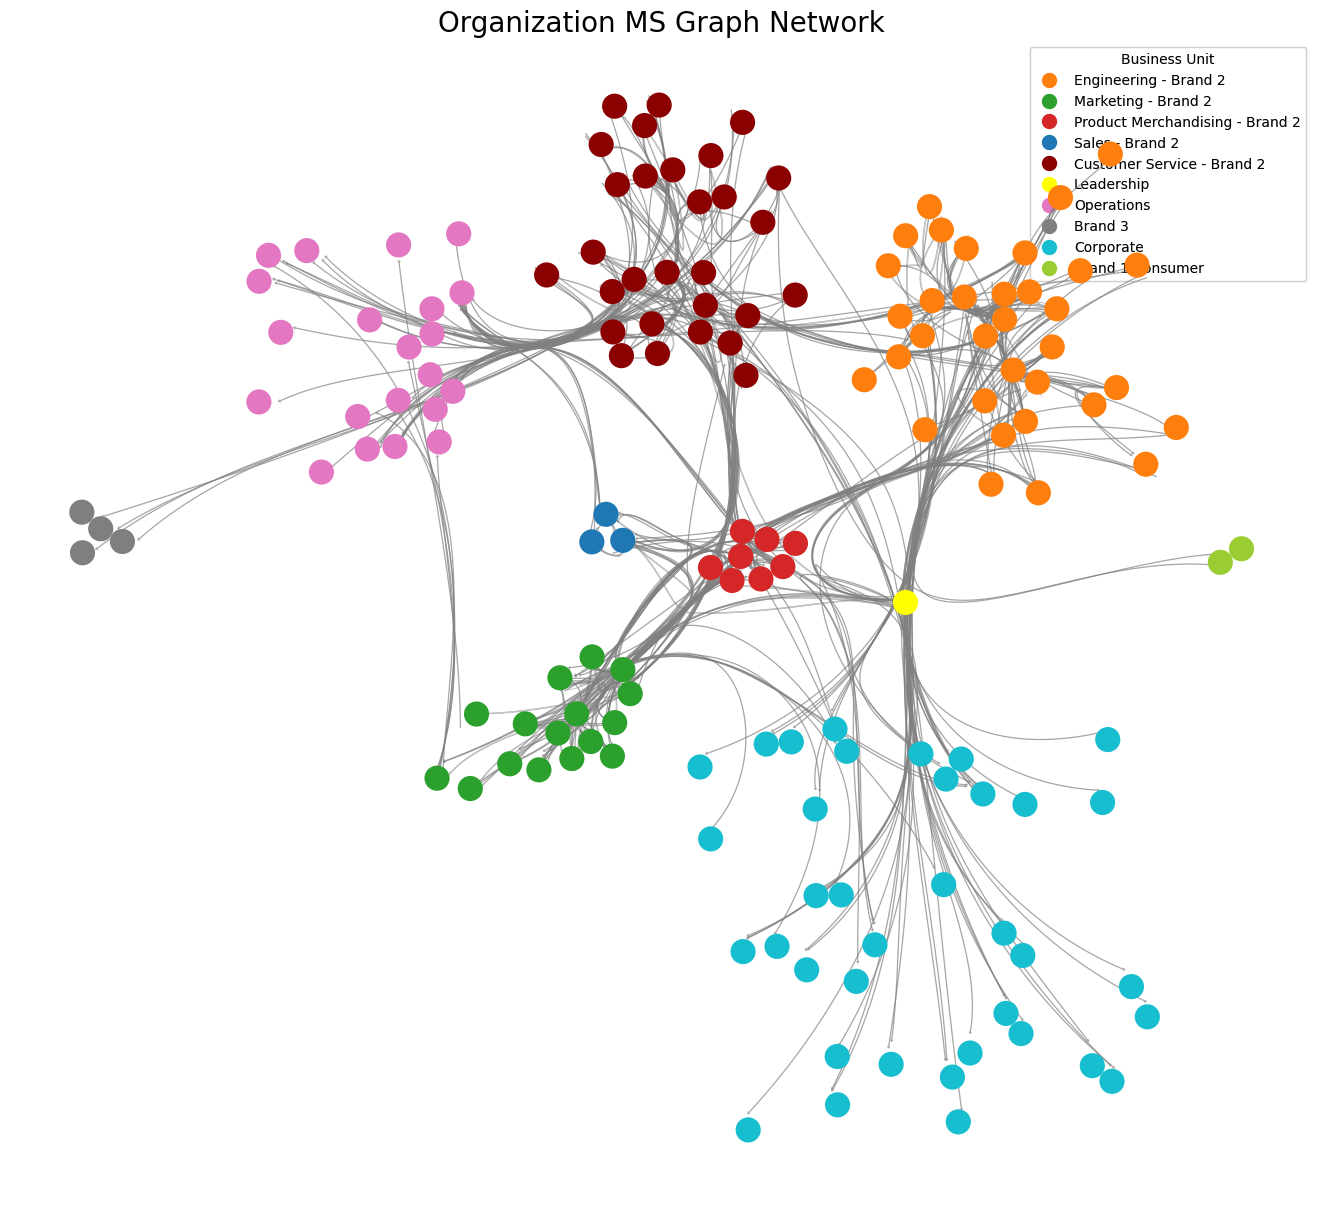

In [31]:
# set a random seed
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True, node_size=1, edge_color='gray'
)

# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', 
                        title='Business Unit')
ax.add_artist(node_legend)
plt.title('Organization MS Graph Network', fontsize = 20)
plt.show()

##### Basic topological attributes

* Total number of nodes in network:
* Total number of edges:
* The average degree of a node:
* The average clustering coefficient:
* The average over all nodes:
* The graph’s density:

In [32]:
# define a funcstion that calculate the nasic toplogical attributes

def network_attribute (G):
    num_n = G.number_of_nodes()
    num_e = G.number_of_edges()
    avg_n = np.mean([d for _, d in G.degree()])
    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
    average_path_lengths = [
        np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
        ]
    overall_avg = np.mean(average_path_lengths)
    den = nx.density(G)
    avg_clustering = nx.average_clustering(G)
    return [("Total number of nodes in network:", num_n),
            ("Total number of edges:", num_e), 
            ("The average degree of a node:", avg_n), 
            ("The average clustering coefficient:", avg_clustering),
            ("The average over all nodes:", overall_avg), 
            ("The graph’s density:", den),
            ]

In [33]:
toplogical_attr = network_attribute(CG)
toplogical_attr


[('Total number of nodes in network:', 155),
 ('Total number of edges:', 548),
 ('The average degree of a node:', np.float64(7.070967741935484)),
 ('The average clustering coefficient:', 0.18301920326320756),
 ('The average over all nodes:', np.float64(2.267929104449879)),
 ('The graph’s density:', 0.022957687473816508)]

Conclustion:

* Total number of nodes in network: 155
* Total number of edges: 548
* On average, a node is connected to almost 7 other nodes, also known as neighbors of the node.
* The average of over all nodes value is 2.26 which represents the average of the shortest path length for all pairs of nodes: in order to reach from one node to another node, roughly 2.26 edges will be traversed on average.
* The graph’s density is 0.023. Clearly, the graph is a sparse one. A good number for density is between 0.40 and 0.60.
* The clustering coefficient measures the degree to which nodes in a graph tend to cluster together. For instance, in a complete graph, the average clustering coefficient will be 1.0, indicating that every possible triangle is present. The reuslt shows a low average clustering coefficient, which indicates a low degree of clustering, meaning nodes are less likely to form tightly-knit groups.This implies limited collaboration and information silos in the organization.


##### Distribution of shortest path length in the network Graph

We would like to construct a visualization of the distribution of shortest path lengths.

Text(0, 0.5, 'Frequency (%)')

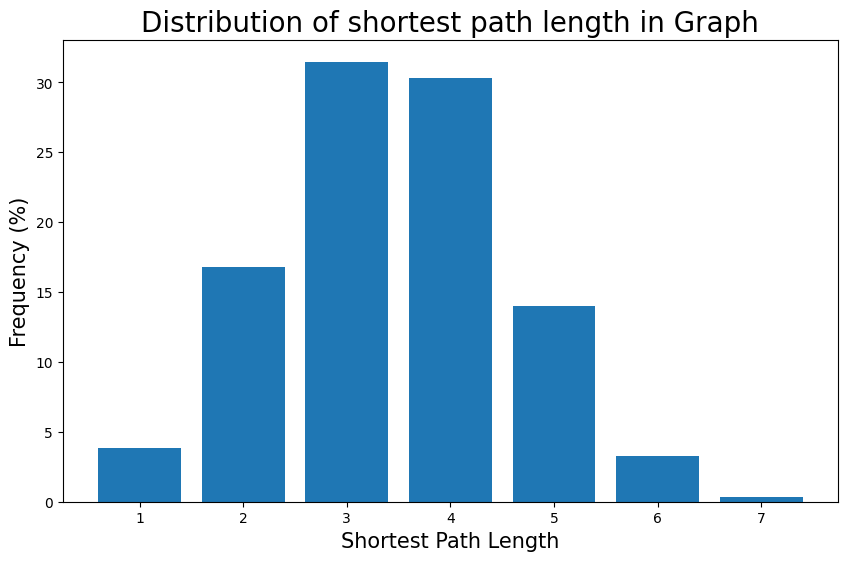

In [34]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in Graph", fontdict={"size": 20}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 15})
ax.set_ylabel("Frequency (%)", fontdict={"size": 15})

Conclusion:

The majority of the shortest path lengths are from 2.5 to 4.5 edges long. Also, it’s highly unlikely for a pair of nodes to have a shortest path of length 7 (diameter length) as the likelihood is less than 1%.

##### Centrality Measurements: focused on individual in the SpoonFlower

In this section, we will survey a number of methods of measuring “centrality” in order to answer following questions:

* Who is more important in the network in terms of number of connections (edges)? - Deegren Centrality
* Who will be a good source of secondhand informations? - Closeness Centrality
* Who play roles as community bridges for allowing information to pass from one part of the newtork to the other. - Betweenness Centrality
* Who is the most influential people within the organization? - Eiganvector Centrality & PageRank

###### Degree centrality - Important nodes based on the number of degrees a node has.

In [35]:
# finding the nodes with the highest degree centralities. 
# Specifically, the nodes with the 5 highest degree centralities

degree_centrality = nx.centrality.degree_centrality(CG)  

# save results in a variable to use again
# top 5 nodes
dc_5 = (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

# bottom 5 nodes
dc_e5 = (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[-5:]
degcent_df = pd.DataFrame(degree_centrality, index=[0]).T
degcent_df.columns = ['degree_centrality']
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False)

degcent = degcent_df.reset_index()
degcent = degcent.rename(columns={'index':'Employee ID'})
degcent.head()

Employee ID  degree_centrality
0      3021660           0.220779
1      2003155           0.188312
2      2003173           0.188312
3      3042755           0.181818
4      2003018           0.175325

In [36]:
# define a function that generate colors

def color_map_color(value, cmap_name='jet', vmin=0, vmax=0.23):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    # will return rgba, we take only first 3 so we get rgb
    rgb = cmap(norm(abs(value)))  
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [37]:

nodeLegend_1 = {}

for i in range(len(degcent)):
    value = degcent['degree_centrality'].iloc[i]
    nodeLegend_1[degcent['Employee ID'].iloc[i]] = color_map_color(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_27376\2696568201.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [38]:
# extrect brand 2 employees data from hr DataFrame

in_sf = hr_df[hr_df['Business Unit level 2'].isin(['Engineering - Brand 2','Marketing - Brand 2', 
                                                   'Product Merchandising - Brand 2',
                                                   'Customer Service - Brand 2',
                                                   'Sales - Brand 2'])]

# create a employee id list for brand 2 organization
b2_id = list(in_sf['Employee ID'])

In [229]:
# all employee id in the whole network

# hr_em = list(hr_df['Employee ID'])

# # brand 2 managers' id
# mg = [3021660, 2003036, 2003148, 3042370, 2003155, 2003173]
# node_shape ={}
# for i in range(len(hr_df)):#hr_em:
#     # specify vp's employee id
#     #'so^>v<dph8'
#     if hr_df['Employee ID'].iloc[i] == 3040598:
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'p'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Engineering - Brand 2': #i in mg:
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'v'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Customer Service - Brand 2':
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'd'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Product Merchandising - Brand 2': 
#         node_shape[hr_df['Employee ID'].iloc[i]] = '^'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Marketing - Brand 2': 
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'h'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Sales - Brand 2':
#         node_shape[hr_df['Employee ID'].iloc[i]] = 's'
#     else:
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'o'
# node_size = {}
# for i in hr_em:
#     if i == 3040598:
#         node_size[i] = 2
#     elif i in mg:
#         node_size[i] = 1.5
#     elif i in b2_id and i not in mg:
#         node_size[i] = 1
#     else:
#         node_size[i] = 0.5

In [39]:
hr_em = list(hr_df['Employee ID'])
mg = [3021660, 2003036, 2003148, 3042370, 2003155, 2003173]
node_shape ={}
for i in hr_em:
    if i == 3040598:
        node_shape[i] = 'd'
    elif i in mg:
        node_shape[i] = 'v'
    else:
        node_shape[i] = 'o'
node_size = {}
for i in hr_em:
    if i == 3040598:
        node_size[i] = 2
    elif i in mg:
        node_size[i] = 1.5
    elif i in b2_id and i not in mg:
        node_size[i] = 1
    else:
        node_size[i] = 0.5

In [40]:
# create a dic that map top 5 degree centraility people's position title with thier employee id

subnodelist = list(degcent['Employee ID'][:5]) #+ list(degcent['Employee ID'][-5:])
hr_id = hr_df[hr_df['Employee ID'].isin(subnodelist)].reset_index(drop=True)

t_label = {}
for i in range(len(hr_df)):
    if hr_df['Employee ID'].iloc[i] in list(hr_id['Employee ID']):
        t_label[hr_df['Employee ID'].iloc[i]] = hr_df['Position Title'].iloc[i]
    else:
        t_label[hr_df['Employee ID'].iloc[i]] = ""

##### Netwrok Graph with Color Coding of Degree Centrality Value

c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Brand 3. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The

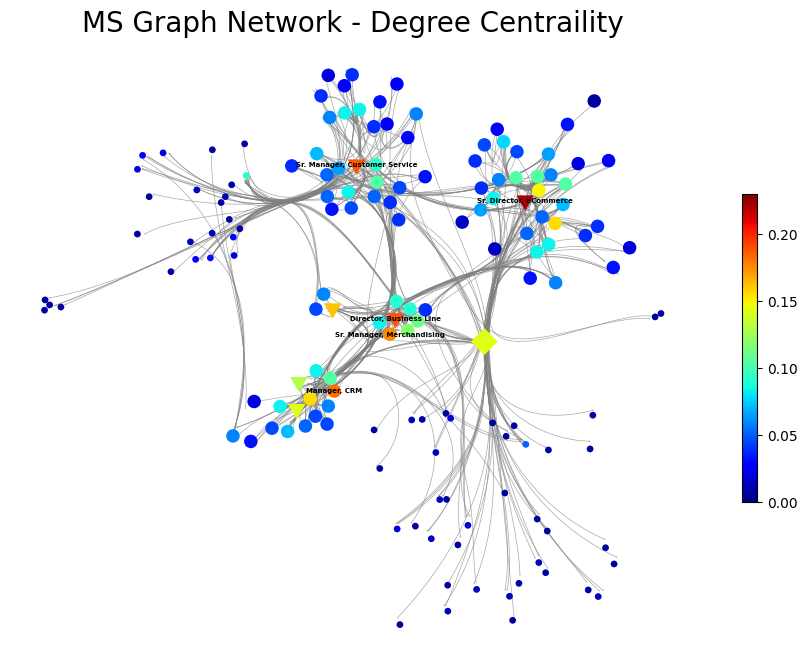

In [41]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape,
      node_labels=t_label, node_label_fontdict=dict(size=5, fontweight='bold')
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.23), cmap='jet'), 
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('MS Graph Network - Degree Centraility', fontsize = 20)
plt.show()

Text(0, 0.5, 'Counts')

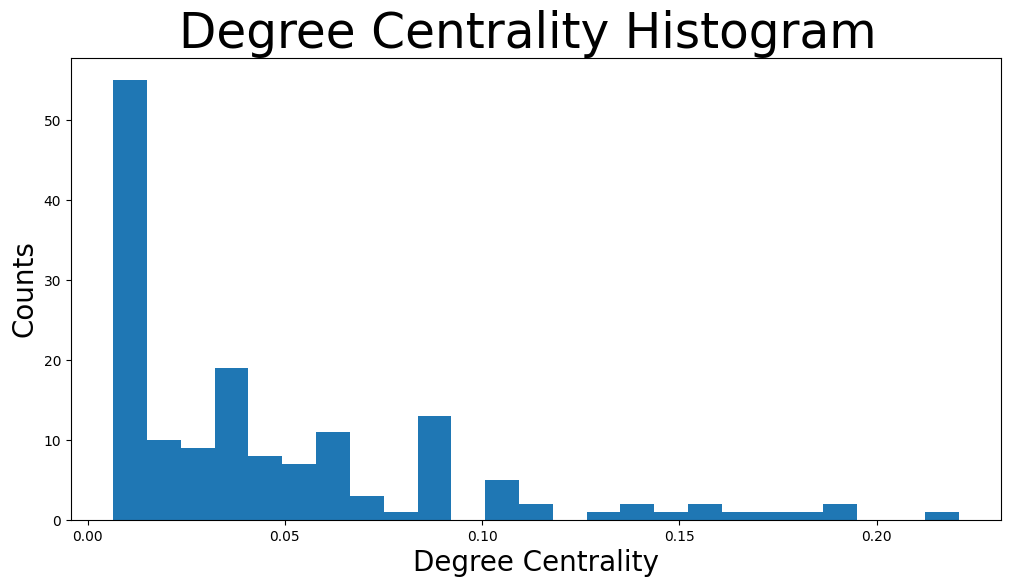

In [42]:
#the distribution of degree centralities

plt.figure(figsize=(12, 6))
plt.hist(degree_centrality.values(), bins=25)
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In an organization with 155 employees, typical degree centrality values can vary based on the network's structure and the relationships between employees. Here are general insights:

1. **Range**: Degree centrality values typically range from 0 to 1. A value closer to 1 indicates that the employee has many direct connections to other employees.

2. **High Degree Centrality**: Employees with high degree centrality are well-connected and may indicates these employees play central roles in communication and collaboration within the organization. In a network of this size (155), high degree centrality values might be in the range of 0.1 to 0.2, depending on the density of connections.

3. **Low Degree Centrality**: Employees with low degree centrality have fewer direct connections. These values are typically closer to 0, indicating more isolated or specialized roles.



##### Closeness centrality - Looing for nodes that are closest to all other nodes (a good source for the secondhand informations).

In [43]:
# The nodes with the highest closeness centralities

closeness_centrality = nx.centrality.closeness_centrality(CG)  

# save results in a variable to use again
cnc_5 = (sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]
cnc_e5 = (sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[-5:]
closecent_df = pd.DataFrame(closeness_centrality, index=[0]).T
closecent_df.columns = ['closeness_centrality']
closecent_df.sort_values('closeness_centrality', inplace=True, ascending=False)
closecent = closecent_df.reset_index()
closecent = closecent.rename(columns={'index':'Employee ID'})
closecent

Employee ID  closeness_centrality
0        2003155              0.279365
1        3040598              0.276295
2        3021660              0.271815
3        2003036              0.267477
4        2002605              0.256560
..           ...                   ...
150      2003199              0.000000
151      2003157              0.000000
152      2000237              0.000000
153      2002435              0.000000
154      3025961              0.000000

[155 rows x 2 columns]

Text(0, 0.5, 'Counts')

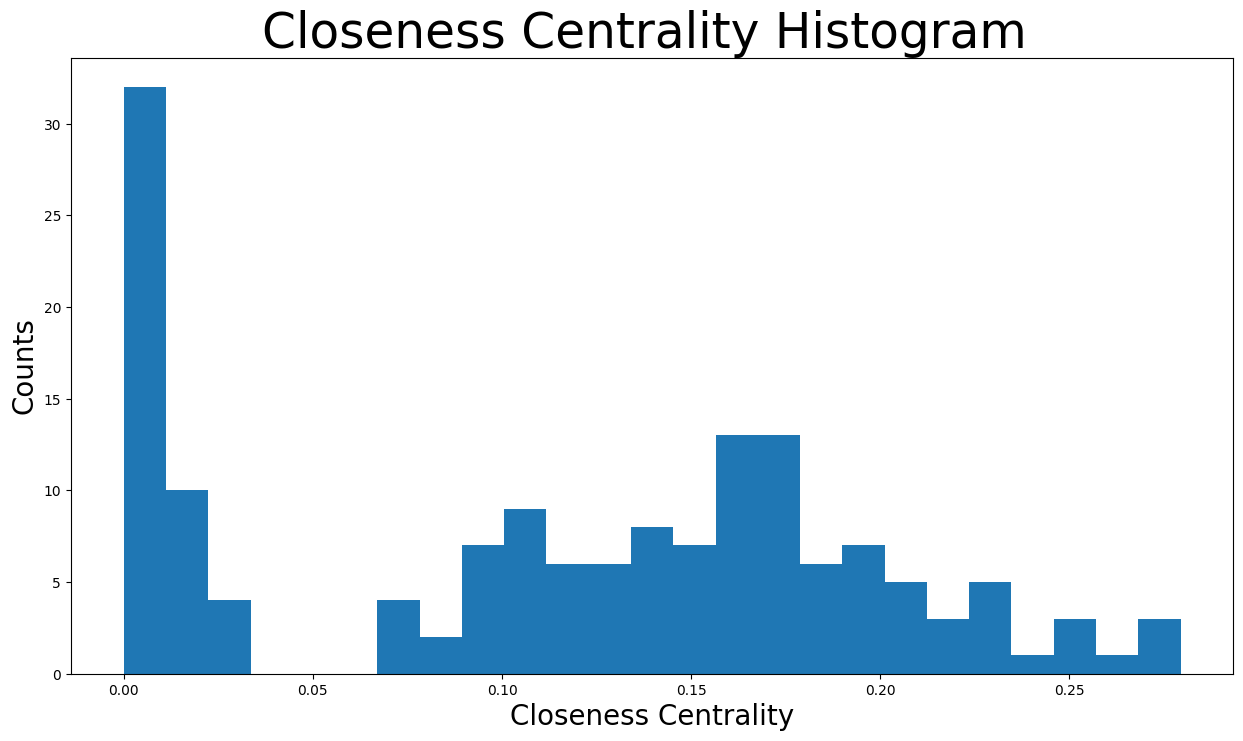

In [44]:
# the distribution of the closeness centralities:

plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=25)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In an organization with 155 employees, typical high and low closeness centrality values can vary based on the network's structure and the relationships between employees. Here are some general insights:

1. **High Closeness Centrality Values**:
   - Employees with high closeness centrality are central to the network, meaning they can communicate and disseminate information rapidly across the organization. In a network of this size, high closeness centrality values might be in the range of 0.5 to 1.
   - **Range**: High closeness centrality values are typically closer to 1. These values indicate that the employee can reach other employees quickly and efficiently⁴.
   - **Interpretation**: Employees with high closeness centrality are central to the network, meaning they can communicate and disseminate information rapidly across the organization.

2. **Low Closeness Centrality Values**:
   - **Range**: Low closeness centrality values are closer to 0. These values indicate that the employee is more peripheral and takes longer to reach other employees.
   - **Interpretation**: Employees with low closeness centrality are less central in terms of communication and information flow. They might be more isolated or specialized in their roles.



In [45]:
def color_map_close(value, cmap_name='jet', vmin=0, vmax=0.28):
    
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    rgb = cmap(norm(abs(value)))  
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [46]:
nodeLegend_close = {}

for i in range(len(closecent)):
    value = closecent['closeness_centrality'].iloc[i]
    nodeLegend_close[closecent['Employee ID'].iloc[i]] = color_map_close(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_27376\794225943.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Brand 3. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The

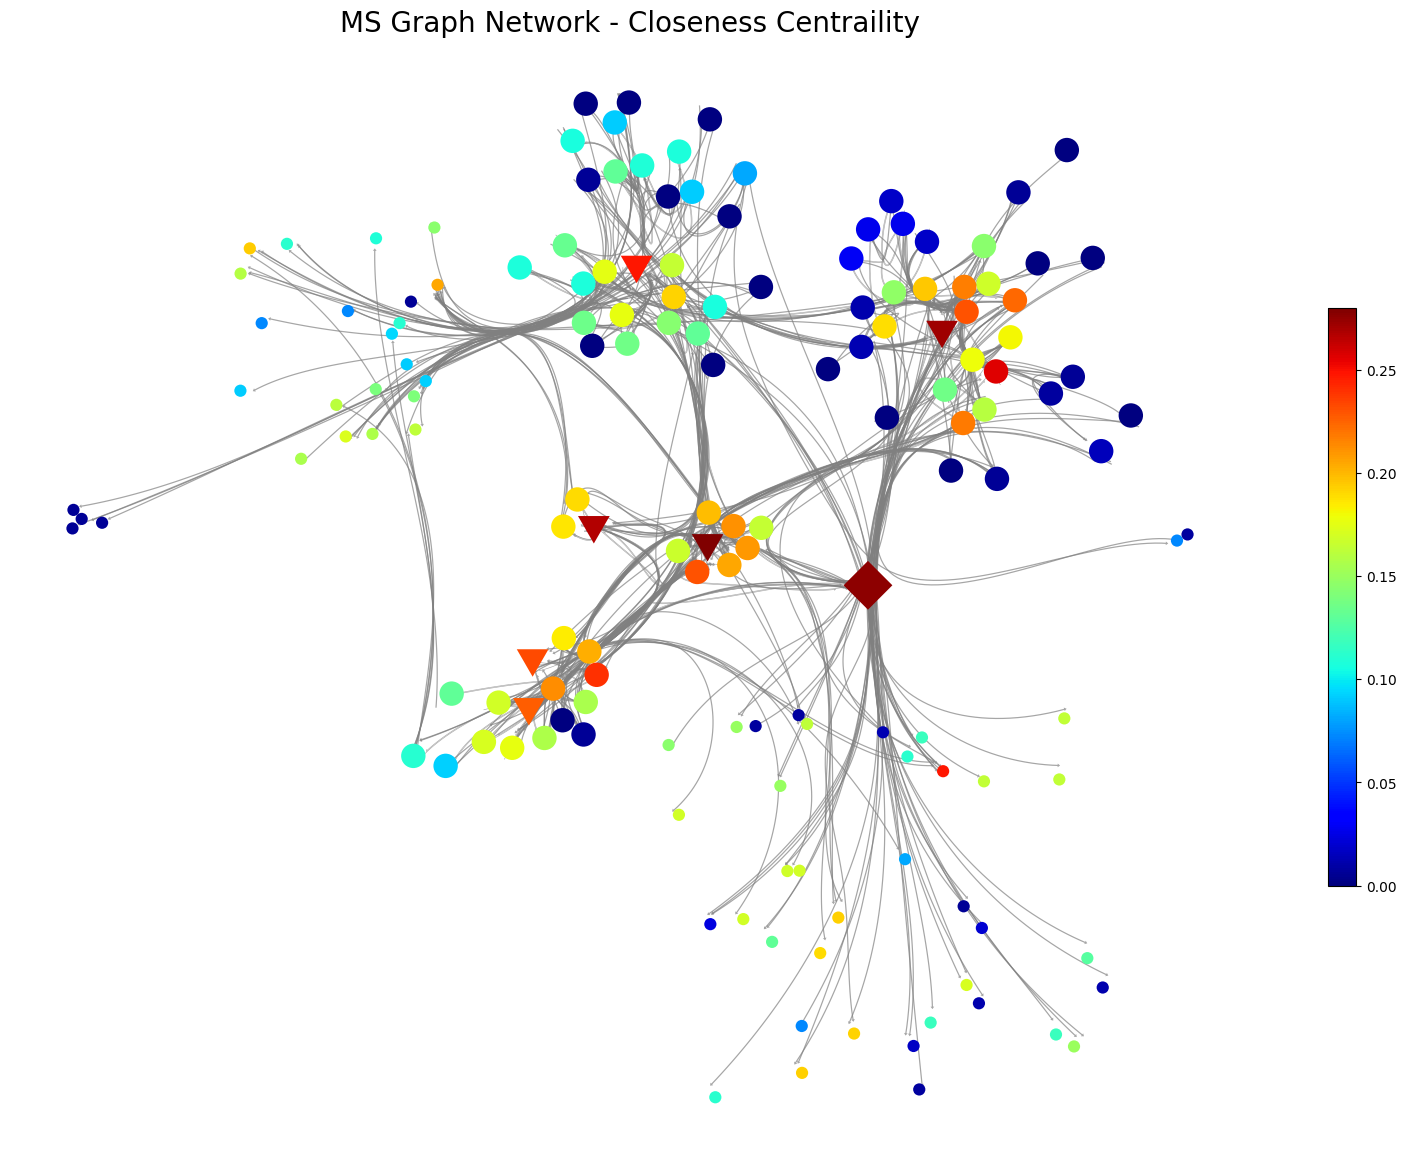

In [47]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_close, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.28), cmap='jet'),
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('MS Graph Network - Closeness Centraility', fontsize = 20)
plt.show()

#### Betweenness Centrality - Finding people aho is the critical role that allows information to pass bwtween teams.

In [48]:
#The highest betweenness centralities will be calculated and shown with their centrality values:

betweenness_centrality = nx.centrality.betweenness_centrality(CG)  

# save results in a variable to use again
bc_5 = (sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]
bc_e5 = (sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[-5:]
betwcent_df = pd.DataFrame(betweenness_centrality, index=[0]).T
betwcent_df.columns = ['betweenness_centrality']
betwcent_df.sort_values('betweenness_centrality', inplace=True, ascending=False)
betwcent = betwcent_df.reset_index()
betwcent = betwcent.rename(columns={'index':'Employee ID'})
betwcent

Employee ID  betweenness_centrality
0        2002605                0.104727
1        3023646                0.081440
2        3021660                0.079697
3        2003186                0.074992
4        2003173                0.068759
..           ...                     ...
150      3025961                0.000000
151      3022052                0.000000
152      2001556                0.000000
153      3019842                0.000000
154      2001575                0.000000

[155 rows x 2 columns]

Text(0, 0.5, 'Counts')

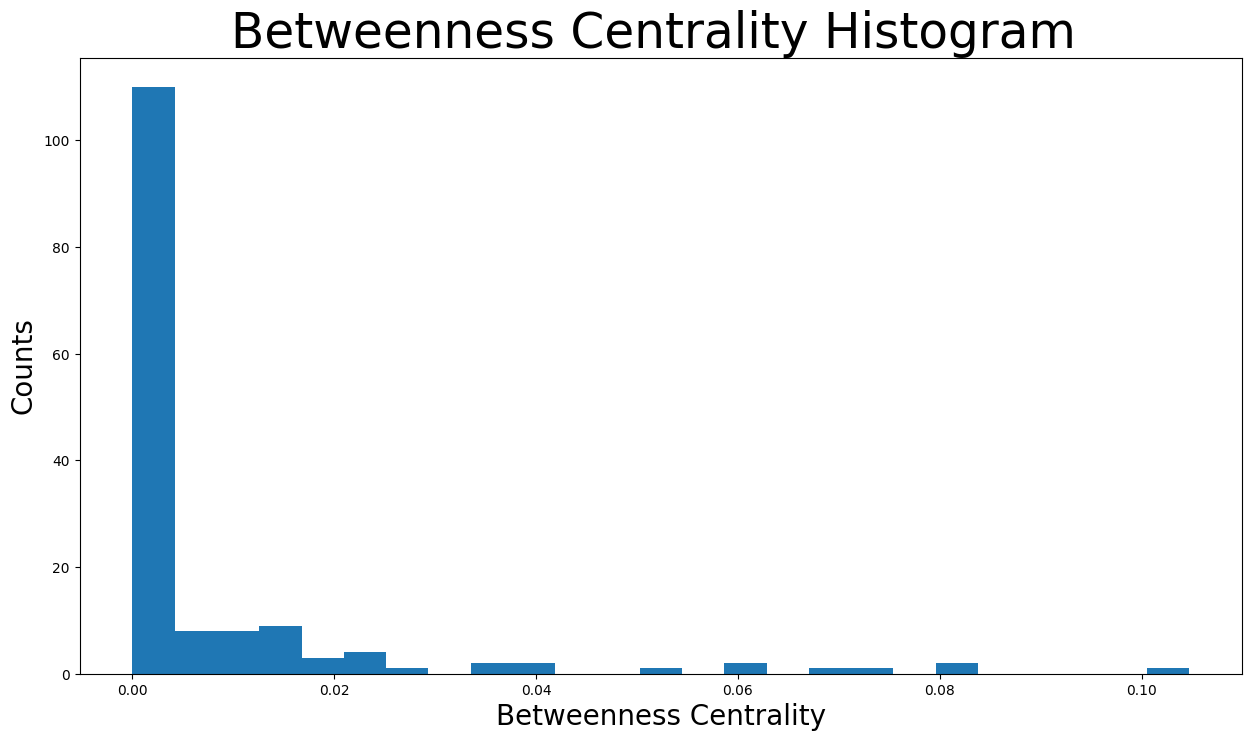

In [49]:
# the distribution of betweenness centralities

plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=25)
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In an organization with 155 employees, typical high and low betweenness centrality values can vary based on the network’s structure and the roles of individuals within it. Here are some general insights:

1. High Betweenness Centrality Values:

* Range: High betweenness centrality values can vary widely, but in a network of this size, values might range from around 0.1 to higher values depending on the network’s complexity.
* Interpretation: Employees with high betweenness centrality are crucial for connecting different parts of the organization. They often act as bridges or brokers, facilitating communication and information flow across the network.

2. Low Betweenness Centrality Values:

* Range: Low betweenness centrality values are typically close to 0. These values indicate that the employee does not frequently act as a bridge between other employees.
* Interpretation: Employees with low betweenness centrality are less central in terms of connecting different parts of the network. They might be more peripheral or specialized in their roles.

In [50]:
def color_map_bw(value, cmap_name='jet', vmin=0, vmax=0.11):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name) 
    rgb = cmap(norm(abs(value)))  
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [51]:
nodeLegend_bw = {}

for i in range(len(betwcent)):
    value = betwcent['betweenness_centrality'].iloc[i]
    nodeLegend_bw[betwcent['Employee ID'].iloc[i]] = color_map_bw(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_27376\1589966290.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Brand 3. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The

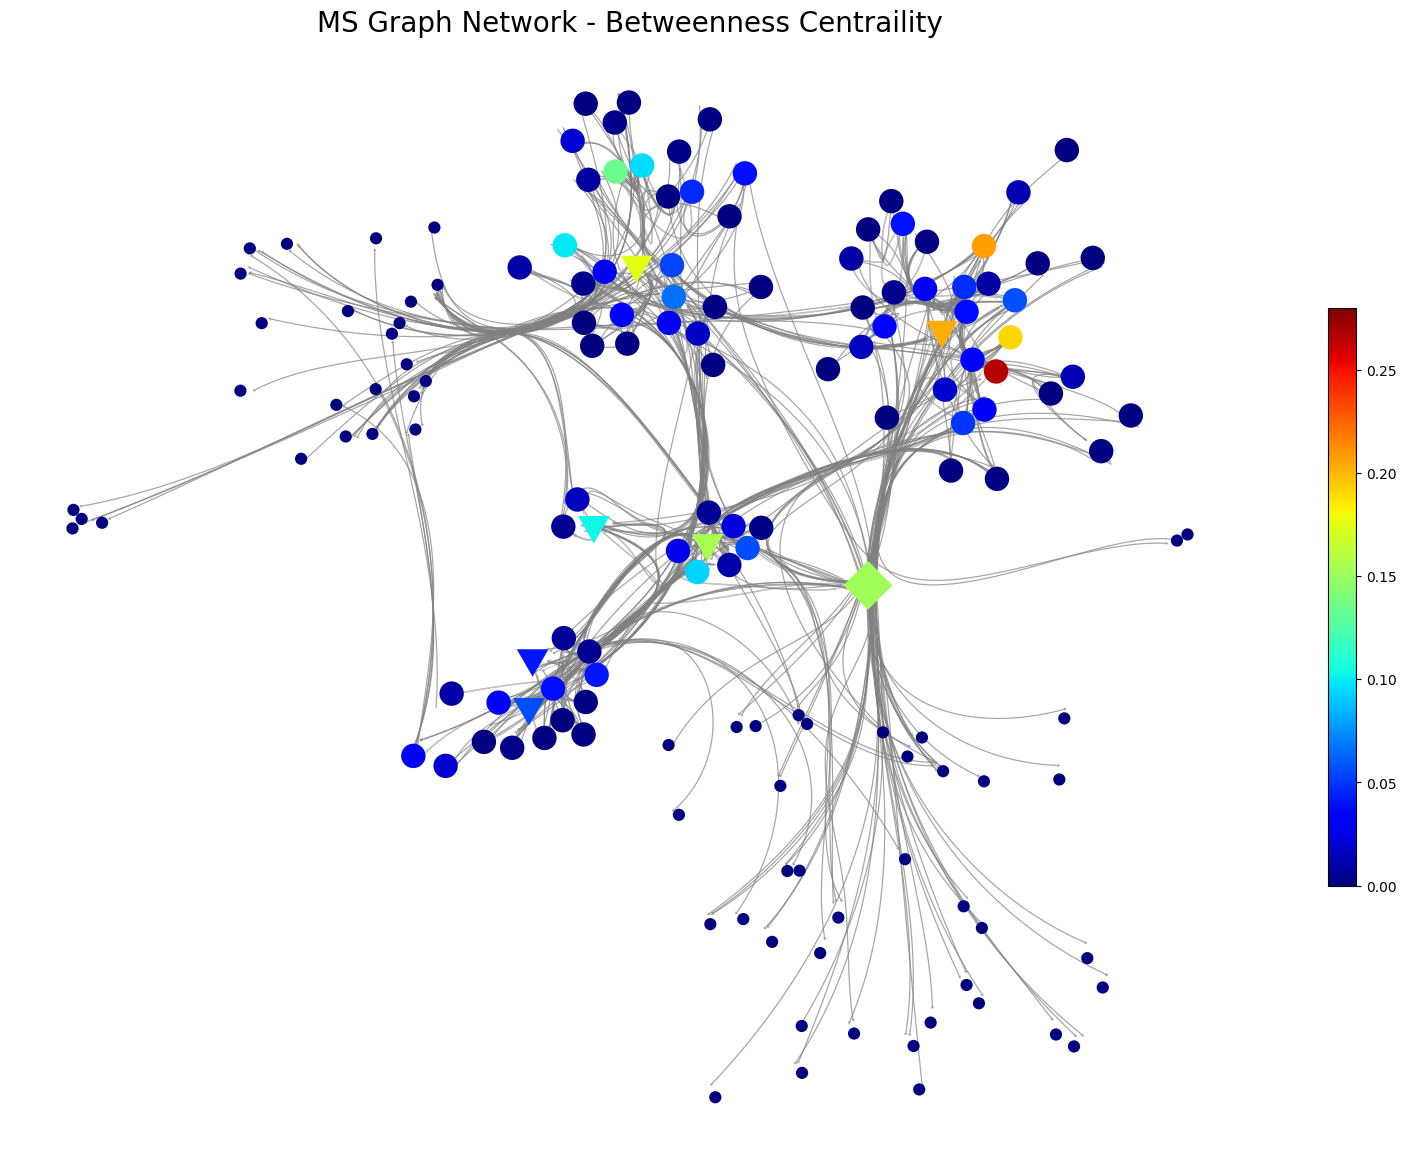

In [52]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_bw, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.28), cmap='jet'),
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('MS Graph Network - Betweenness Centraility', fontsize = 20)
plt.show()

#### Eigenvector Centrality - identifying the nodes with the most influence over the whole network.

In [53]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(CG)  

# save results in a variable to use again
eigc_5 = (sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:5]
eigc_e5 = (sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[-5:]
eigencent_df = pd.DataFrame(eigenvector_centrality, index=[0]).T
eigencent_df.columns = ['eigenvector_centrality']
eigencent_df.sort_values('eigenvector_centrality', inplace=True, ascending=False)
eigencent = eigencent_df.reset_index()
eigencent = eigencent.rename(columns={'index':'Employee ID'})
eigencent.head()


Employee ID  eigenvector_centrality
0      2003155                0.407810
1      3042370                0.333095
2      2003018                0.291347
3      2003036                0.287529
4      2003133                0.281831

In [54]:
def color_map_eigen(value, cmap_name='jet', vmin=0, vmax=0.41):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    rgb = cmap(norm(abs(value))) 
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [55]:
nodeLegend_eigen = {}

for i in range(len(eigencent)):
    value = eigencent['eigenvector_centrality'].iloc[i]
    nodeLegend_eigen[eigencent['Employee ID'].iloc[i]] = color_map_eigen(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_27376\1156430877.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Brand 3. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The

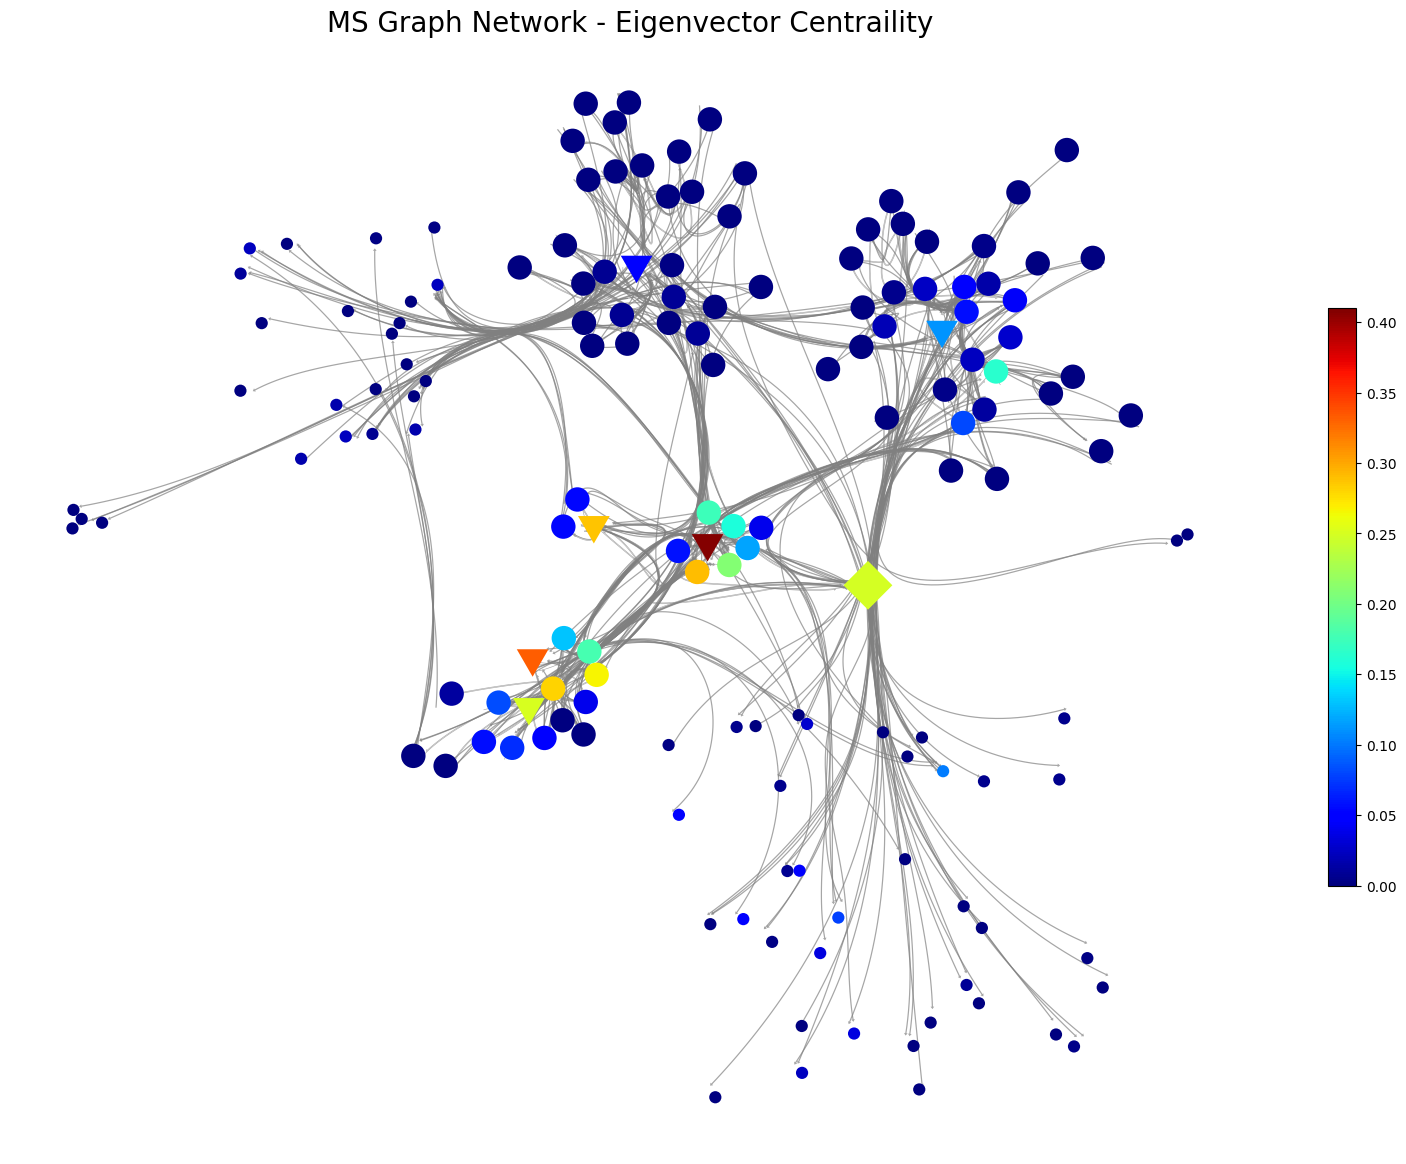

In [56]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_eigen, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.41), cmap='jet'),
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('MS Graph Network - Eigenvector Centraility', fontsize = 20)
plt.show()

Text(0, 0.5, 'Counts')

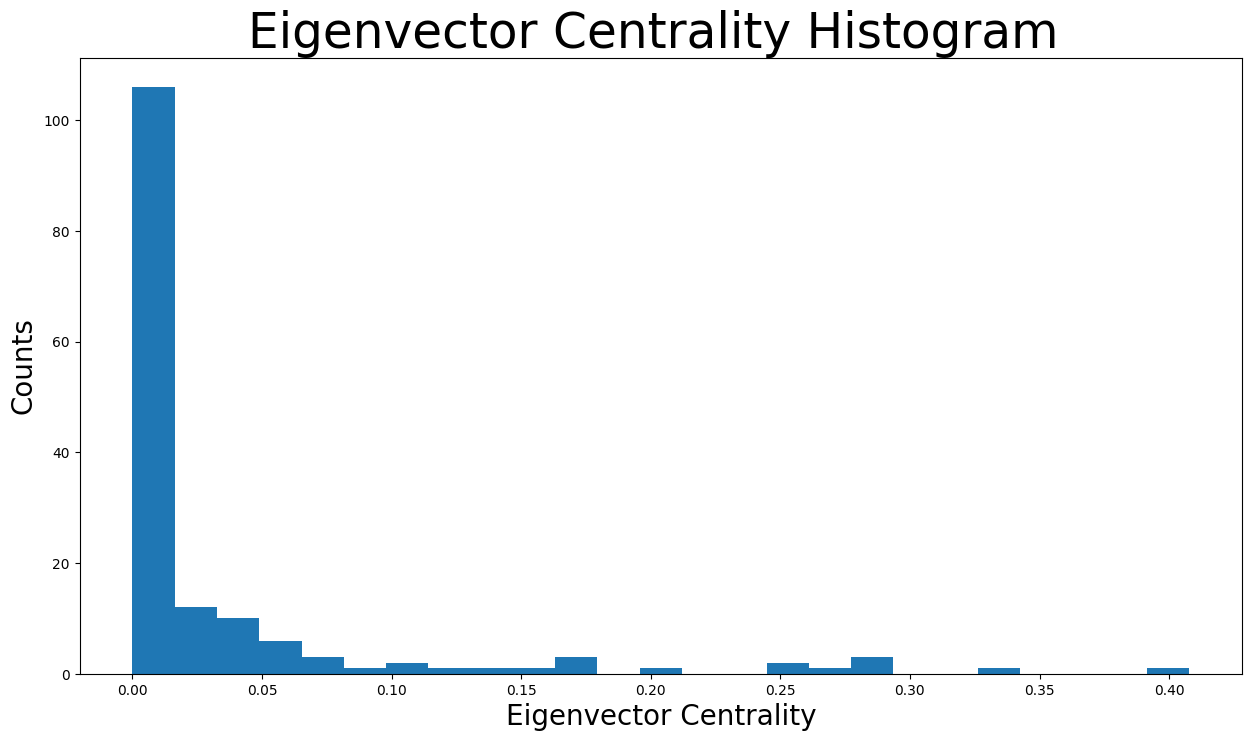

In [57]:
# the distribution of eigenvector centrality

plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=25)
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In an organization with 155 employees, the typical high and low eigenvector centrality values can vary based on the network's structure and the relationships between employees. Here are some general insights:

1. **High Eigenvector Centrality Values**:
   - **Range**: High eigenvector centrality values are typically closer to 1. In a well-connected network, these values might range from 0.7 to 1.
   - **Interpretation**: Employees with high eigenvector centrality are highly influential and well-connected to other influential employees. These are often key individuals such as managers or central figures in the organization⁵.

2. **Low Eigenvector Centrality Values**:
   - **Range**: Low eigenvector centrality values are closer to 0. In a typical organizational network, these values might range from 0 to 0.3.
   - **Interpretation**: Employees with low eigenvector centrality have fewer connections to influential employees. These individuals might be on the periphery of the network or in less central roles.

#### PageRank Centrality - measuring the importance of webpages based on the quality and quantity of links pointing to them

In [58]:
pagerank = nx.pagerank(CG, alpha=0.85, max_iter=100)

# save results in a variable to use again
pgr_5 = (sorted(pagerank.items(), key=lambda item: item[1], reverse=True))[:5]
pgr_e5 = (sorted(pagerank.items(), key=lambda item: item[1], reverse=True))[-5:]
pagerank_df = pd.DataFrame(pagerank, index=[0]).T
pagerank_df.columns = ['pagerank']
pagerank_df.sort_values('pagerank', inplace=True, ascending=False)
prank = pagerank_df.reset_index()
prank = prank.rename(columns={'index':'Employee ID'})
prank

Employee ID  pagerank
0        2003155  0.030877
1        2003036  0.029100
2        3021660  0.029087
3        3040598  0.024716
4        2003148  0.023958
..           ...       ...
150      2003199  0.002520
151      2003157  0.002520
152      2000237  0.002520
153      2002435  0.002520
154      3025961  0.002520

[155 rows x 2 columns]

Text(0, 0.5, 'Counts')

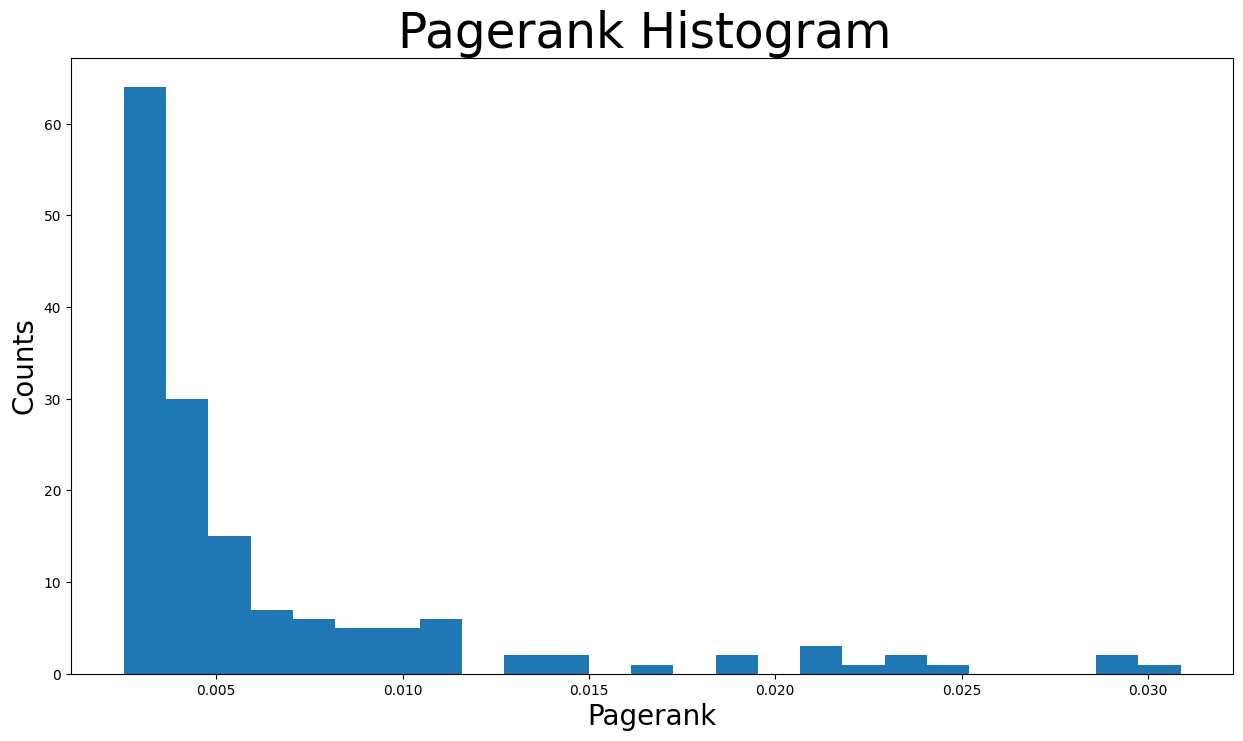

In [59]:
# the distribution of pagerank

plt.figure(figsize=(15, 8))
plt.hist(pagerank.values(), bins=25)
plt.title("Pagerank Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Pagerank", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [60]:
# a function for generating colors

def color_map_pg(value, cmap_name='jet', vmin=0, vmax=0.031):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    rgb = cmap(norm(abs(value))) 
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [61]:
nodeLegend_pg = {}

for i in range(len(prank)):
    value = prank['pagerank'].iloc[i]
    nodeLegend_pg[prank['Employee ID'].iloc[i]] = color_map_pg(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_27376\1145723317.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Brand 3. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The

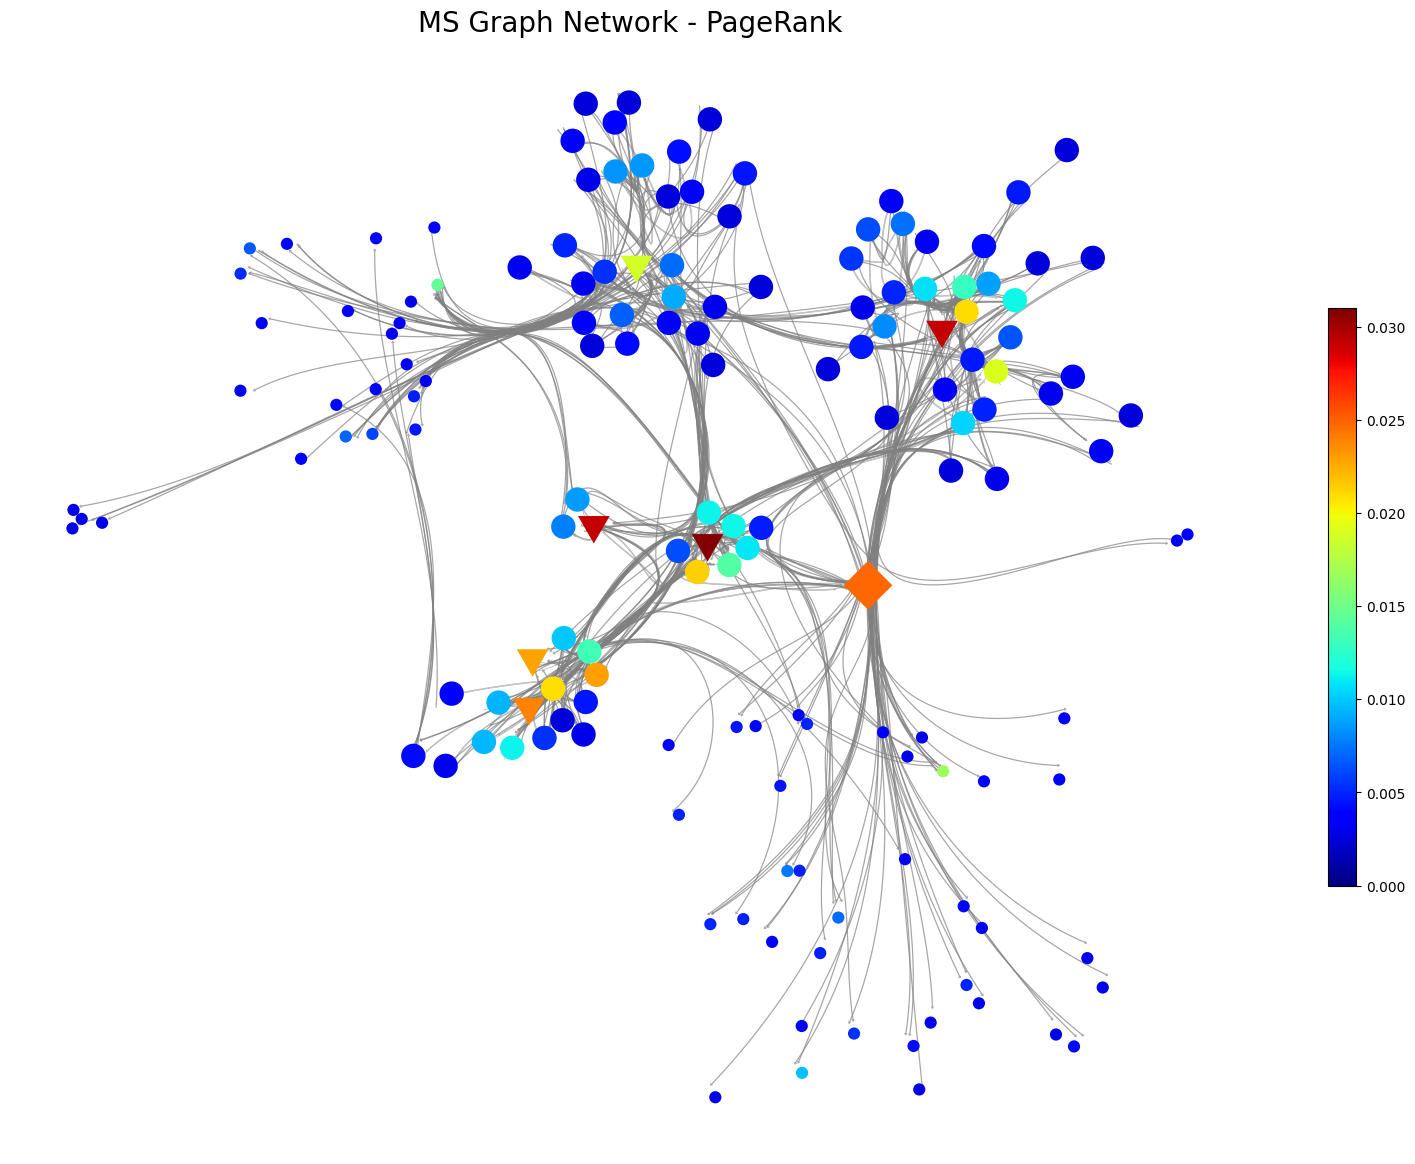

In [62]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_pg, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.031), cmap='jet'),
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('MS Graph Network - PageRank', fontsize = 20)
plt.show()

In [151]:
#creating a dataframe for top 5 person's position title in each centrality measures

top_5_cent = pd.DataFrame()
top_5_cent['Order'] = range(1, 6)


def title_top5(df):
    de_p =[]
    for i in df['Employee ID'][:5]:
        data = hr_df[hr_df['Employee ID'] == i].iloc[0]['Position Title']
        de_p.append(data)
    return de_p

top_5_cent['Degree Centrality'] = title_top5(degcent)
top_5_cent['Closeness Centrality'] = title_top5(closecent)
top_5_cent['Betweenness Centrality'] = title_top5(betwcent)
top_5_cent['Eigenvector Centrality'] = title_top5(eigencent)

top_5_cent


Order              Degree Centrality     Closeness Centrality  \
0      1        Sr. Director, eCommerce  Director, Business Line   
1      2        Director, Business Line           VP, GM Brand 2   
2      3  Sr. Manager, Customer Service  Sr. Director, eCommerce   
3      4                   Manager, CRM          Director, Sales   
4      5     Sr. Manager, Merchandising          Product Manager   

          Betweenness Centrality        Eigenvector Centrality  
0                Product Manager       Director, Business Line  
1          Product Specialist II    Director, Growth - Brand 2  
2        Sr. Director, eCommerce    Sr. Manager, Merchandising  
3          Product Specialist II               Director, Sales  
4  Sr. Manager, Customer Service  Sr. Manager, Brand Marketing

In [64]:
top_5_cent.columns
cens = top_5_cent[['Order', 'Degree Centrality', 'Closeness Centrality',
       'Betweenness Centrality', 'Eigenvector Centrality']]
list(cens[cens['Order'] == 5].values)

[array([5, 'Sr. Manager, Merchandising', 'Product Manager',
        'Sr. Manager, Customer Service', 'Sr. Manager, Brand Marketing'],
       dtype=object)]

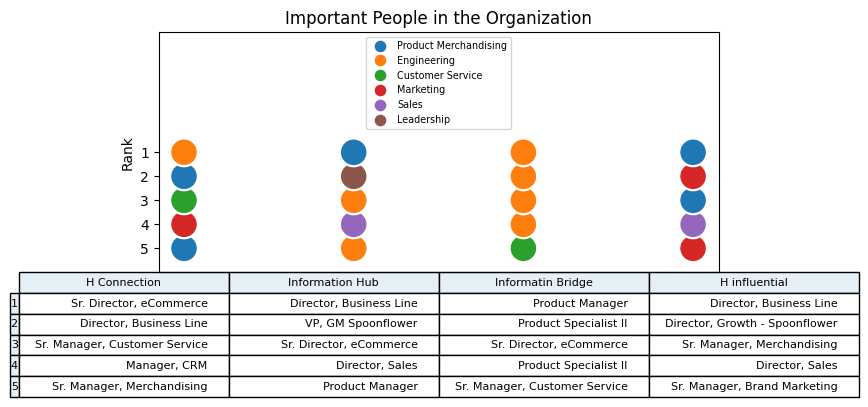

In [152]:

# creat data, rows and columns for dot plot
data =  [
        'Product Merchandising','Engineering', 
        'Customer Service','Marketing',
        'Marketing', 'Sales',
        'Engineering', 'Sales',
        'Customer Service', 'Engineering',
        'Engineering', 'Product Merchandising',
        'Product Merchandising', 'Leadership',
        'Engineering', 'Marketing',
        'Engineering','Product Merchandising', 
        'Engineering','Product Merchandising']

columns = ['H Connection', 'Information Hub', 'Informatin Bridge', 'H influential',
     'H Connection', 'Information Hub', 'Informatin Bridge', 'H influential',
     'H Connection', 'Information Hub', 'Informatin Bridge', 'H influential',
     'H Connection', 'Information Hub', 'Informatin Bridge', 'H influential',
     'H Connection', 'Information Hub', 'Informatin Bridge', 'H influential']
rows = [1, 1, 1, 1, 
     2, 2, 2, 2, 
     3, 3, 3, 3, 
     4, 4, 4, 4,  
     5, 5, 5, 5, ]
# create a dataframe

data_list = pd.DataFrame(
    {'Centrality': columns,
     'Rank': rows,
     'Team category': data
    })



# scatter plot
plt.figure(figsize = (8, 5))
sns.scatterplot(data=data_list,x="Centrality", y="Rank", hue="Team category", s=400)

# Plot bars and create text labels for the table
cell_text = [['Sr. Director, eCommerce', 'Director, Business Line',
        'Product Manager', 'Director, Business Line'],
         ['Director, Business Line', 'VP, GM Spoonflower',
        'Product Specialist II', 'Director, Growth - Spoonflower'],
         ['Sr. Manager, Customer Service', 'Sr. Director, eCommerce',
        'Sr. Director, eCommerce', 'Sr. Manager, Merchandising'],
         ['Manager, CRM', 'Director, Sales', 'Product Specialist II',
        'Director, Sales'],
        ['Sr. Manager, Merchandising', 'Product Manager',
        'Sr. Manager, Customer Service', 'Sr. Manager, Brand Marketing']]

# Reverse colors and text labels to display the last value at the top.
# Get some lists of color specs for row and column headers
row_headers = [1, 2, 3, 4, 5]
column_headers = ['H Connection', 'Information Hub', 'Informatin Bridge', 'H influential']
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))



# Add a table at the bottom of the Axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='bottom', )
the_table.scale(1.5, 2)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.4)

#plt.yticks(range(1, 6))
plt.yticks(ticks = [1, 2, 3, 4, 5], labels = [5, 4, 3, 2, 1])
plt.xticks([])
plt.ylim(0, 10)
plt.legend(loc = 'upper center', markerscale=0.5, fontsize='x-small')
plt.xlabel('')
plt.title('Important People in the Organization')
plt.show()


In [66]:
# creating a dataframe for bottom 5 person's position title in each centrality measures

def title_bottom5(df):
    de_p =[]
    for i in df['Employee ID'][-5:]:
        data = hr_df[hr_df['Employee ID'] == i].iloc[0]['Position Title']
        de_p.append(data)
    reverse = list(reversed(de_p))
    return reverse

bottom_5_cent = pd.DataFrame()
bottom_5_cent['Order'] = range(1, 6)
bottom_5_cent['Degree Centrality'] = title_bottom5(degcent)
bottom_5_cent['Closeness Centrality'] = title_bottom5(closecent)
bottom_5_cent['Betweenness Centrality'] = title_bottom5(betwcent)
bottom_5_cent['Eigenvector Centrality'] = title_bottom5(eigencent)
bottom_5_cent['PagaRank'] = title_bottom5(prank)
bottom_5_cent

Order                          Degree Centrality  \
0      1                           Director Finance   
1      2             Client Services Coordinator II   
2      3                                   VP, CISO   
3      4                Manager, Product Management   
4      5  Sr. Environmental Health & Safety Manager   

                  Closeness Centrality               Betweenness Centrality  \
0  Sr. Software Development Engineer I                     Director Finance   
1    Customer Service Representative 3       Client Services Coordinator II   
2                      Art Director II                             VP, CISO   
3    Customer Service Representative 4          Manager, Product Management   
4    Customer Service Representative 4  Sr. Software Development Engineer I   

                Eigenvector Centrality                             PagaRank  
0  Sr. Software Development Engineer I  Sr. Software Development Engineer I  
1    Customer Service Representative 3    Customer Service Representative 3  
2                      Art Director II                      Art Director II  
3    Customer Service Representative 4    Customer Service Representative 4  
4    Customer Service Representative 4    Customer Service Representative 4

### Network Analysis - Part II at Team Level


In [67]:
# creating a function for extractng subset data form ms_people dataset
# extract team nerwork connection within and among other business units
def ms_sub(team):
    sub_1 = ms_people[(ms_people['Business Unit level 2_sender'] == str(team)) |
                      (ms_people['Business Unit level 2_receiver'] == str(team))]
    return sub_1

#extract team nerwork connection within team
def team(unit):
    sub_2 = ms_people[(ms_people['Business Unit level 2_sender'] == str(unit)) &
                      (ms_people['Business Unit level 2_receiver'] == str(unit))]
    return sub_2

#extract team nerwork connection within and among spoonflower teams
sf_e = list(ms_people['Employee ID_sender'].unique())
new_p = ms_people[ms_people['Employee ID_receiver'].isin(sf_e)].reset_index(drop=True)
new_p

def sf_sub(team):
    sub_1 = new_p[(new_p['Business Unit level 2_sender'] == str(team)) |
                      (new_p['Business Unit level 2_receiver'] == str(team))]
    return sub_1


##### Network Graph at Team Level

* Customer Service - Brand 2
* Engineering - Brand 2
* Marketing - Brand 2
* Product Merchandising - Brand 2
* Sales - Brand 2

Network Connection within a Team, among other business unit

In [68]:
# Creating a dataframe and graph for each team's overall connection

# Customer Service ---------------------------------------------------------
custom_team = ms_sub('Customer Service - Brand 2')
CSG =nx.from_pandas_edgelist(custom_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
ICSG =nx.from_pandas_edgelist(custom_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Engineering --------------------------------------------------------------
eng_team = ms_sub('Engineering - Brand 2')
EG =nx.from_pandas_edgelist(eng_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IEG =nx.from_pandas_edgelist(eng_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Marketing ----------------------------------------------------------------
mkt_team = ms_sub('Marketing - Brand 2')
MG =nx.from_pandas_edgelist(mkt_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IMG =nx.from_pandas_edgelist(mkt_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Product Merchandishing ---------------------------------------------------
pm_team = ms_sub('Product Merchandising - Brand 2')
PG =nx.from_pandas_edgelist(pm_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IPG =nx.from_pandas_edgelist(pm_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Sales --------------------------------------------------------------------
sales_team = ms_sub('Sales - Brand 2')
SG =nx.from_pandas_edgelist(sales_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
ISG =nx.from_pandas_edgelist(sales_team, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())

Team's Connection among other teams in the Brand 2

In [69]:
# Creating a dataframe and graph for each team

# Customer Service ---------------------------------------------------------
custom_sf = sf_sub('Customer Service - Brand 2')
CSG_sf =nx.from_pandas_edgelist(custom_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
ICSG_sf =nx.from_pandas_edgelist(custom_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Engineering --------------------------------------------------------------
eng_sf = sf_sub('Engineering - Brand 2')
EG_sf =nx.from_pandas_edgelist(eng_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IEG_sg =nx.from_pandas_edgelist(eng_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Marketing ----------------------------------------------------------------
mkt_sf = sf_sub('Marketing - Brand 2')
MG_sf =nx.from_pandas_edgelist(mkt_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IMG_sf =nx.from_pandas_edgelist(mkt_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Product Merchandishing ---------------------------------------------------
pm_sf = sf_sub('Product Merchandising - Brand 2')
PG_sf =nx.from_pandas_edgelist(pm_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IPG_df =nx.from_pandas_edgelist(pm_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Sales --------------------------------------------------------------------
sales_sf = sf_sub('Sales - Brand 2')
SG_sf =nx.from_pandas_edgelist(sales_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
ISG_sf =nx.from_pandas_edgelist(sales_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())

Network Connection within a Team

In [70]:
# Creating a dataframe and graph for each team

# Customer Service ---------------------------------------------------------
only_cus = team('Customer Service - Brand 2')
cs_members = list(hr_df[hr_df['Business Unit level 2'] == 'Customer Service - Brand 2']['Employee ID'])
OCG = CG.subgraph(cs_members)
CIG = G.subgraph(cs_members)
# Engineering ---------------------------------------------------------------
only_eng = team('Engineering - Brand 2')
eng_members = list(hr_df[hr_df['Business Unit level 2'] == 'Engineering - Brand 2']['Employee ID'])
OEG = CG.subgraph(eng_members)
EIG = G.subgraph(eng_members)
# Marketing -----------------------------------------------------------------
only_mkt = team('Marketing - Brand 2')
mkt_members = list(hr_df[hr_df['Business Unit level 2'] == 'Marketing - Brand 2']['Employee ID'])
OMG = CG.subgraph(mkt_members)
MIG = G.subgraph(mkt_members)
# Product Merchdishing ------------------------------------------------------
only_pm = team('Product Merchandising - Brand 2')
pm_members = list(hr_df[hr_df['Business Unit level 2'] == 'Product Merchandising - Brand 2']['Employee ID'])
OPG = CG.subgraph(pm_members)
PIG = G.subgraph(pm_members)
# Sales ---------------------------------------------------------------------
only_sales = team('Sales - Brand 2')
s_members = list(hr_df[hr_df['Business Unit level 2'] == 'Sales - Brand 2']['Employee ID'])
OSG = CG.subgraph(s_members)
SIG = G.subgraph(s_members)



In [71]:
# define a function that create a network graph 

def team_graph(df, G, name):

    rednodes = list(set(list(slr['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    bluenodes = list(set(list(seng['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    greennodes = list(set(list(smt['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    yellowgreennodes = list(set(list(spm['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    orangenodes = list(set(list(ssale['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    pinknodes = list(set(list(scs['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    purplenodes = list(opera[opera['Employee ID'].isin(list(df['Employee ID_receiver']))]['Employee ID'])
    blacknodes = list(lifet[lifet['Employee ID'].isin(list(df['Employee ID_receiver']))]['Employee ID'])
    yellownodes = list(corp[corp['Employee ID'].isin(list(df['Employee ID_receiver']))]['Employee ID'])
    brownnodes = list(shfycs[shfycs['Employee ID'].isin(list(df['Employee ID_receiver']))]['Employee ID'])
    

    
    pos = nx.spring_layout(G, iterations=15, seed=1721)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis("off")
    nx.draw_networkx_nodes(G, pos=pos, nodelist=rednodes, ax = ax, node_size = 100, 
                           node_color='red', label='Leadership')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=bluenodes, ax = ax, node_size = 100,
                           node_color='blue', label='Engineering')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=greennodes, ax = ax, node_size = 100,
                           node_color='green', label='Marketing')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=yellowgreennodes, ax = ax, node_size = 100,
                           node_color='yellowgreen', label='Product Merchandising')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=orangenodes, ax = ax, node_size = 100,
                           node_color='orange', label='Sales')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=pinknodes, ax = ax, node_size = 100,
                           node_color='pink', label='Customer Service')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=purplenodes, ax = ax, node_size = 100,
                       node_color='purple', label='Operations')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=blacknodes, ax = ax, node_size = 100,
                       node_color='black', label='Brand 3')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=yellownodes, ax = ax, node_size = 100,
                       node_color='yellow', label='Coperate')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=brownnodes, ax = ax, node_size = 100,
                       node_color='brown', label='Brand 1 Consumer')
    nx.draw_networkx_edges(G, pos=pos, edge_color=df['relevanceScore'], width=1.0, edge_cmap=plt.cm.Blues)
    plt.legend(scatterpoints = 1)
    plt.title(str(name) + " Team's Network Graph", fontsize = 25)
    return plt.show()

In [72]:
# define a function that create a list of connection for a team

def team_net(team):
    edges = []
    for i in range(len(team)):
        v = team['Employee ID_sender'].iloc[i]
        u = team['Employee ID_receiver'].iloc[i]
        w = team['relevanceScore'].iloc[i]
        t =(v, u, w)
        edges.append(t)
    return edges

In [73]:
# list of connection for customer service team

cs_net = team_net(custom_team)

Customer Service Team Network Connection within Team Team and among other Teams

In [74]:
#define employee id for customer service manager

mg_cs = [2003173]

#create a dic for different node shape
node_shape ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_cs:
        node_shape[i] = 'v'
    else:
        node_shape[i] = 'o'
#create a dic for differnt node size
node_size = {}
for i in sf_em:
    if i in mg_cs:
        node_size[i] = 2
    else:
        node_size[i] = 1

c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Product Merchandising - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Brand 3. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within comm

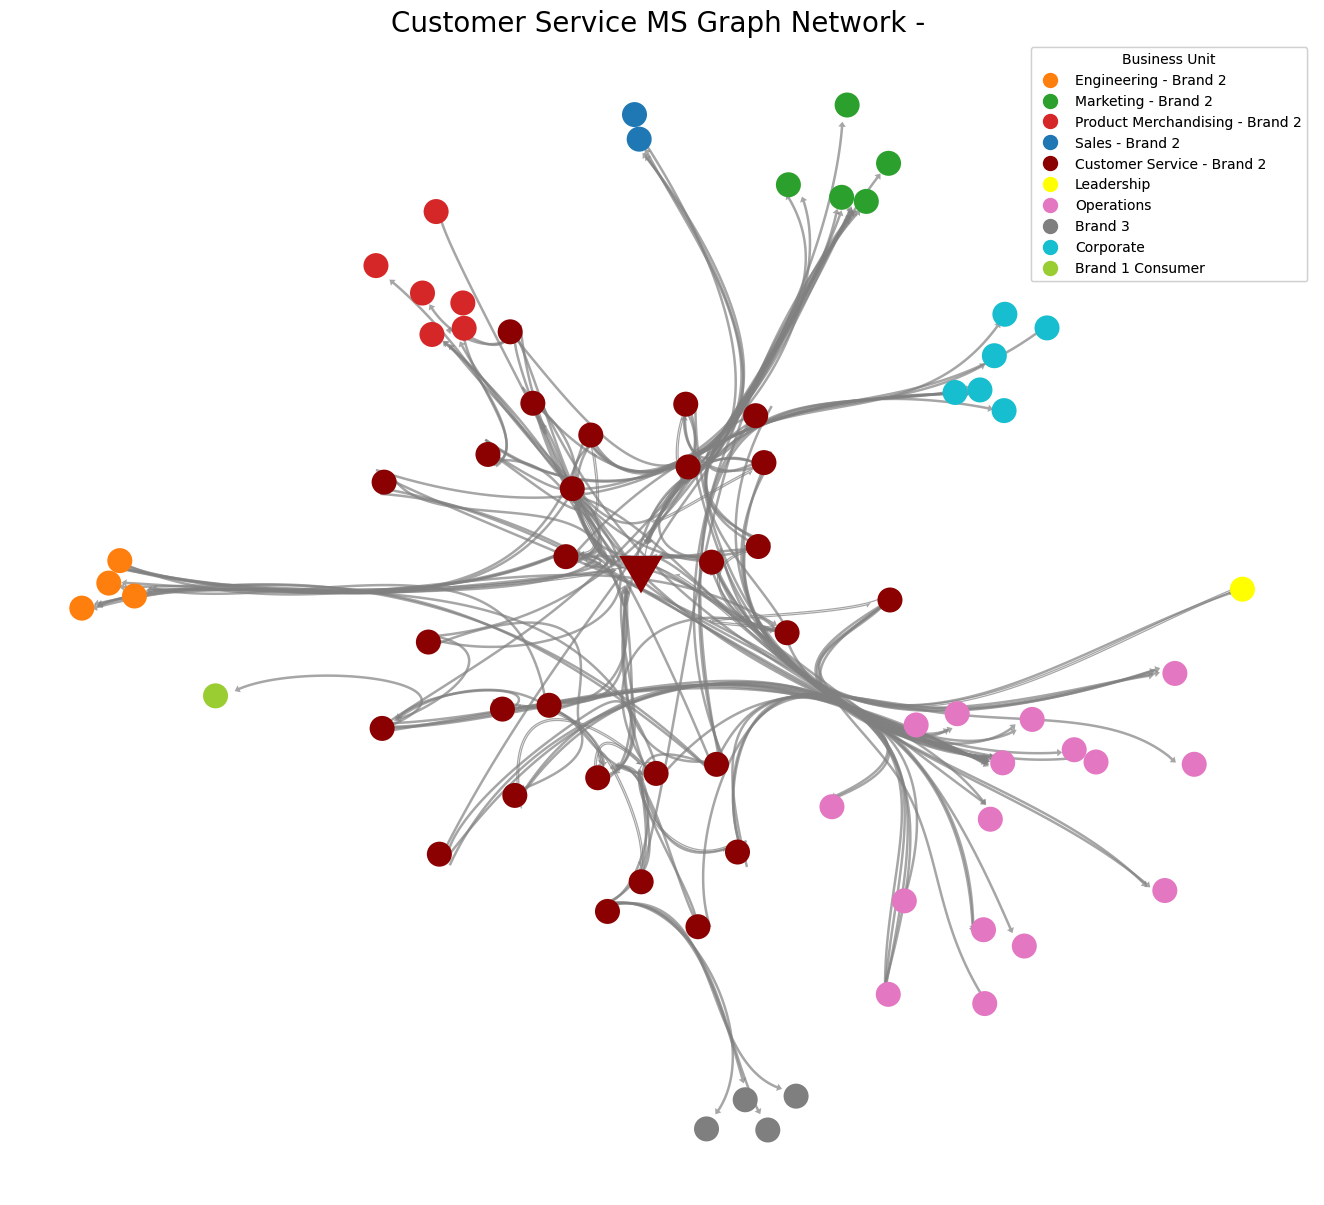

In [75]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(cs_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',  #node_size=1,
      node_size=node_size, node_shape=node_shape,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', title='Business Unit')
ax.add_artist(node_legend)
plt.title('Customer Service MS Graph Network - ', fontsize = 20)
plt.show()

In [82]:
#mg = [3021660, 2003036, 2003148, 3042370, 2003155, 2003173]
mg_cs = [2003173]
mg_eng =[3021660]
mg_mkt = [3042370, 2003148]
mg_pm = [2003155]

# node shape and size for Product Merchandising Team
node_shape_pm ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_pm:
        node_shape_pm[i] = 'v'
    else:
        node_shape_pm[i] = 'o'
node_size_pm = {}
for i in sf_em:
    if i in mg_pm:
        node_size_pm[i] = 2
    else:
        node_size_pm[i] = 1

# retrive PM team network connection
pm_net = team_net(pm_team)

Product Merchandising Team Network Connection within Team Team and among other Teams

c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Marketing - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Customer Service - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections with

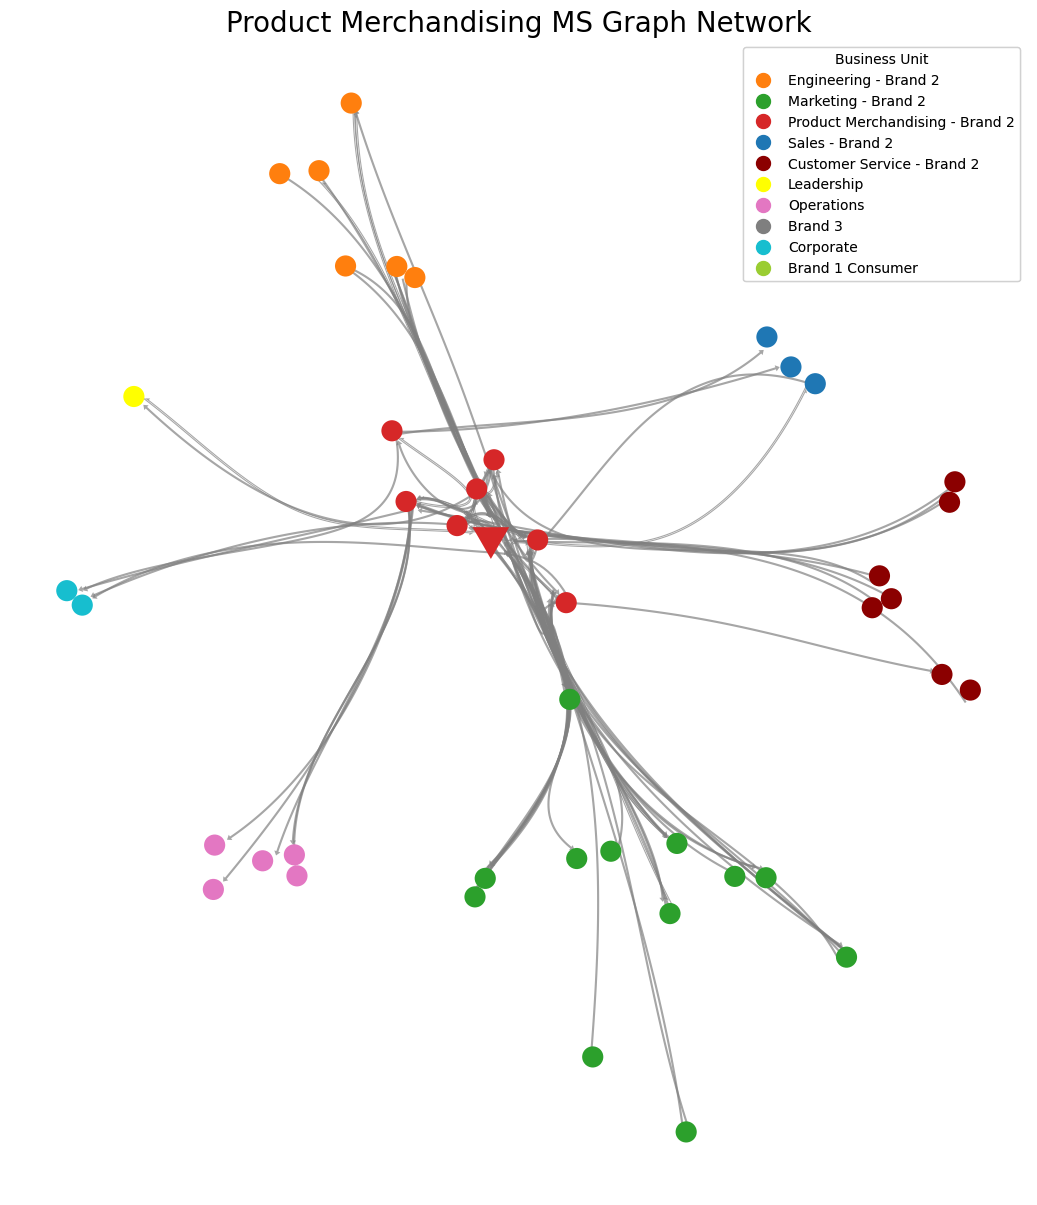

In [83]:
#plot Product Merchandising Team Network Connection within Team Team and with other Teams
# using differnt node shape to identify team manager

np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(pm_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',
      node_size=node_size_pm, node_shape=node_shape_pm,
)

# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', title='Business Unit')
ax.add_artist(node_legend)
plt.title('Product Merchandising MS Graph Network', fontsize = 20)
plt.show()

Engineering Team Network Connection within Team Team and among other Teams

In [84]:
mg_eng =[3021660]

# node shape and size for Engineering Team
node_shape_eng ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_eng:
        node_shape_eng[i] = 'v'
    else:
        node_shape_eng[i] = 'o'
node_size_eng = {}
for i in sf_em:
    if i in mg_eng:
        node_size_eng[i] = 2
    else:
        node_size_eng[i] = 1


c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Customer Service - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Marketing - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections withi

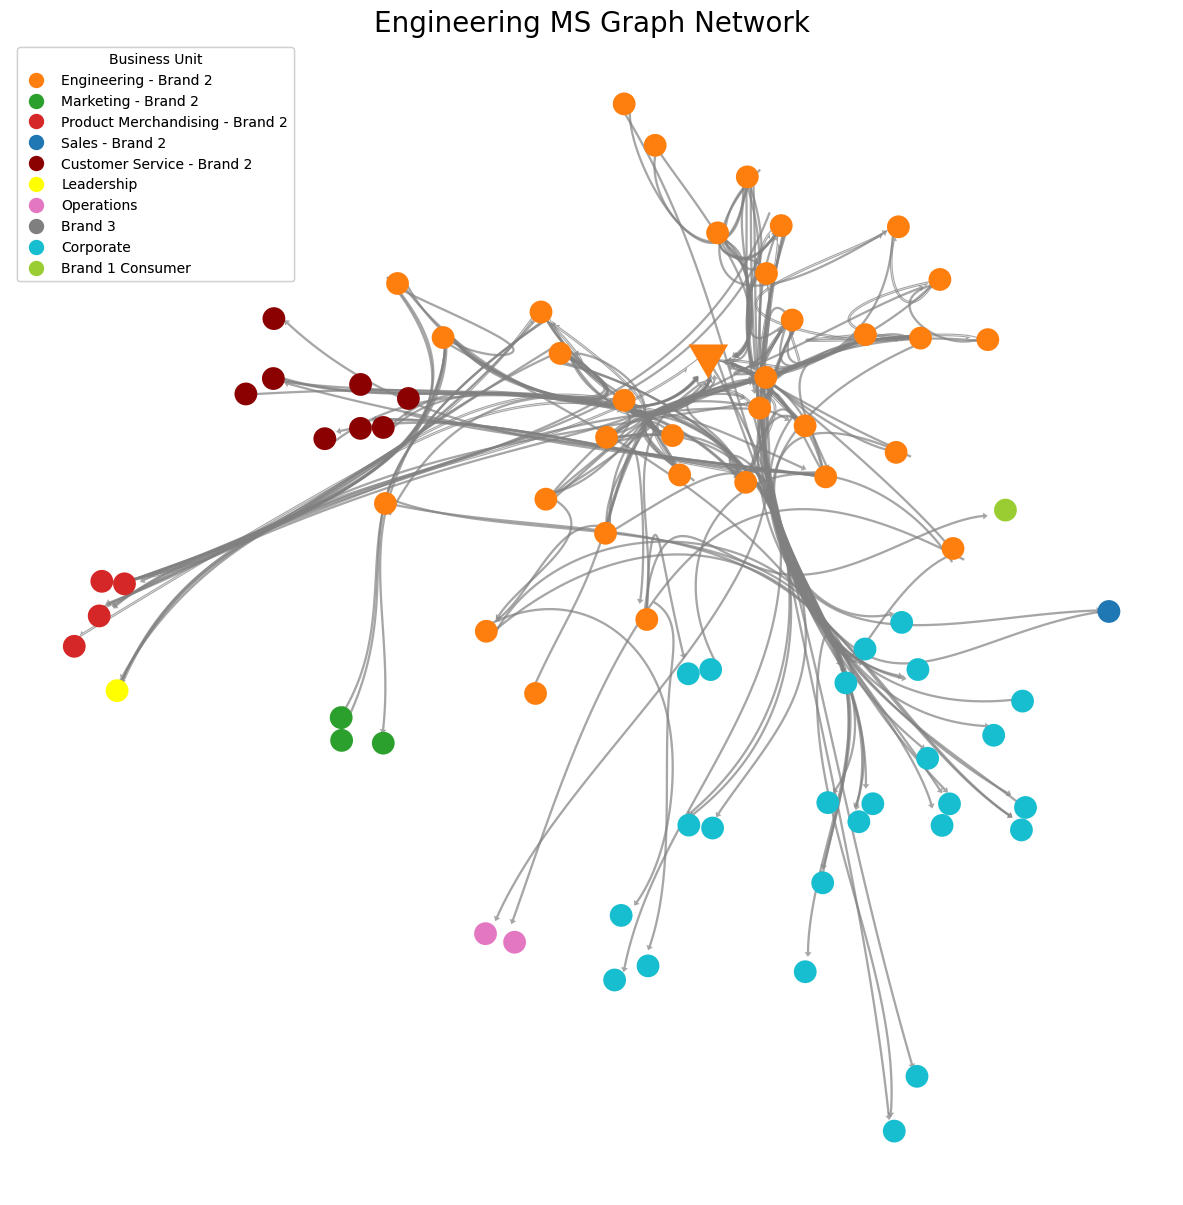

In [85]:
# retrieve network connection for engineering team

eng_net = team_net(eng_team)

#plot eng network within team among other business unit

np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(eng_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',
      node_size=node_size_eng, node_shape=node_shape_eng,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper left', title='Business Unit')
ax.add_artist(node_legend)
plt.title('Engineering MS Graph Network', fontsize = 20)
plt.show()

Marketing Team Network Connection within Team Team and among other Teams

In [86]:
mg_mkt = [3042370, 2003148]

# node shape and size for Marketing Team
node_shape_mkt ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_mkt:
        node_shape_mkt[i] = 'v'
    else:
        node_shape_mkt[i] = 'o'
node_size_mkt = {}
for i in sf_em:
    if i in mg_mkt:
        node_size_mkt[i] = 2
    else:
        node_size_mkt[i] = 1

c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Product Merchandising - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Customer Service - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no conn

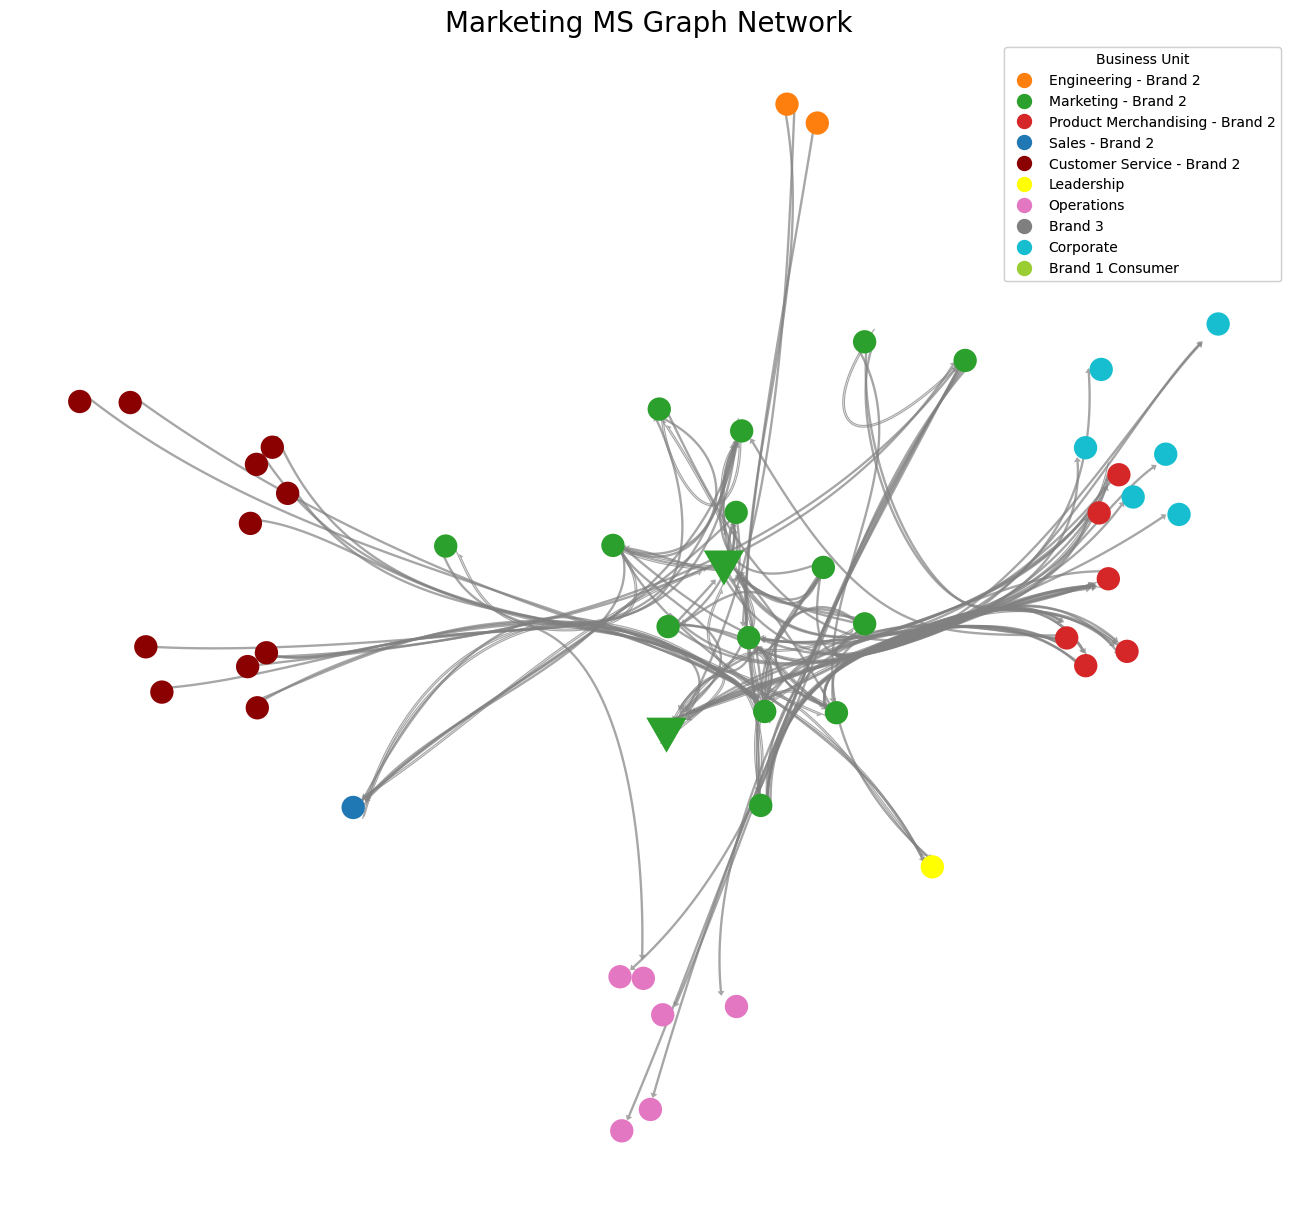

In [88]:
mkt_net = team_net(mkt_team)

np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(mkt_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',
      node_size=node_size_mkt, node_shape=node_shape_mkt,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', title='Business Unit')
ax.add_artist(node_legend)
plt.title('Marketing MS Graph Network', fontsize = 20)
plt.show()

Sales Team Network Connection within Team Team and among other Teams

In [89]:
mg_sale = [2003036]

# node shape and size for sales Team
node_shape_sale ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_sale:
        node_shape_sale[i] = 'v'
    else:
        node_shape_sale[i] = 'o'
node_size_sale = {}
for i in sf_em:
    if i in mg_sale:
        node_size_sale[i] = 2
    else:
        node_size_sale[i] = 1

c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Engineering - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Marketing - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within co

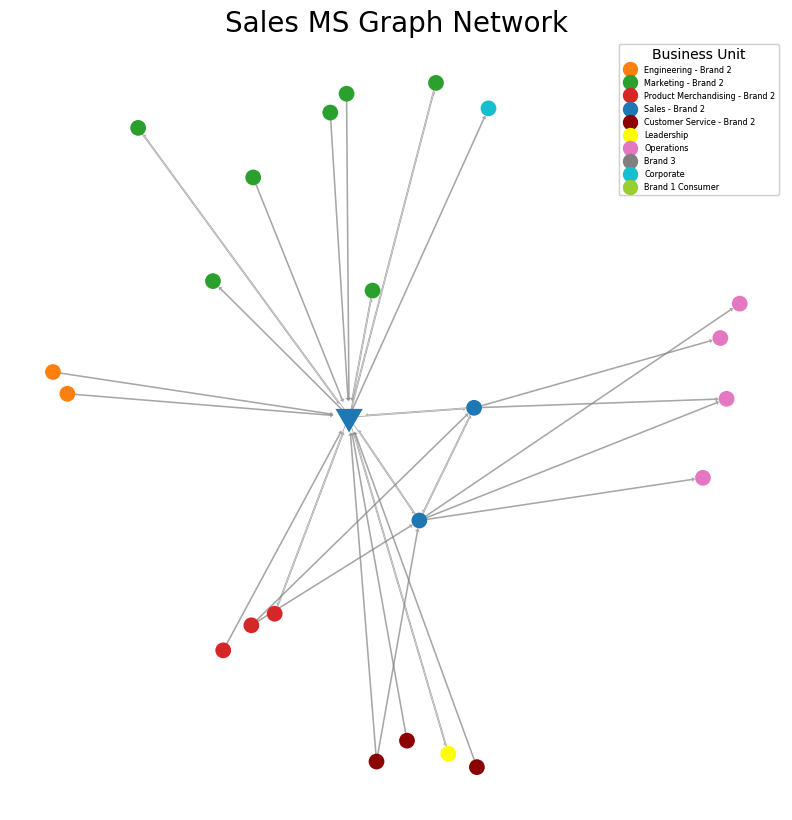

In [90]:
sale_net = team_net(sales_team)

np.random.seed(0)

fig, ax = plt.subplots(figsize=(15, 10))
ax.axis("off")
Graph(sale_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='straight', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',
      node_size=node_size_sale, node_shape=node_shape_sale,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', title='Business Unit', fontsize='xx-small')
ax.add_artist(node_legend)
plt.title('Sales MS Graph Network', fontsize = 20)
plt.show()

##### Calculate percentage of each employee's bridge function based on the number of connection outside of team

In [91]:
#create a function to calculate the each team member's bridge function by percentage
# parameter 1 - teams: dataframe that includes a team's within team and among teams connetions;
# parameter 2 - oteam: dataframe that only has within team connection
# parameter 2 - name: define the name of interesting team

def percent_out(teams, oteam, name):
    out_cont = teams[(teams['Business Unit level 2_receiver'] != str(name))|
                     (teams['Business Unit level 2_sender'] != str(name))]
    ids = list(oteam['Employee ID_sender'].unique())
    dic_p = {}
    for i in ids:
        df = out_cont[(out_cont['Employee ID_sender'] == i)|
                  (out_cont['Employee ID_receiver'] == i)]
        lens = len(df)
        x = hr_df[hr_df['Employee ID'] == i]
        dic_p[i] = (x['Position Title'].iloc[0], round(lens/len(out_cont), 2))
    return dic_p

In [92]:
sale_p = percent_out(sales_team, only_sales, 'Salse - Brand 2')
sale_p

{np.int64(2003036): ('Director, Sales', 0.71),
 np.int64(2003112): ('Sr. Account Service Manager I', 0.26),
 np.int64(3025972): ('Sr. Account Service Manager I', 0.2)}

In [93]:
cs_p = percent_out(custom_team, only_cus, 'Customer Service - Brand 2')
vs = []
for i in list(cs_p.keys()):
    a = cs_p[i][1]
    vs.append(a)
sum(vs)
dict(sorted(cs_p.items(), key=lambda item: item[1][1], reverse=True))


{np.int64(2003173): ('Sr. Manager, Customer Service', 0.09),
 np.int64(3021784): ('Customer Service Representative 3', 0.07),
 np.int64(3029869): ('Workforce Analyst I', 0.06),
 np.int64(3030001): ('Customer Service Representative 3', 0.05),
 np.int64(2002210): ('Customer Service Representative 4', 0.05),
 np.int64(2003137): ('Spvsr, Customer Service I', 0.05),
 np.int64(2003171): ('Customer Service Representative 4', 0.04),
 np.int64(2003156): ('Manager, Customer Service', 0.04),
 np.int64(2002910): ('Customer Service Representative 4', 0.04),
 np.int64(3004874): ('Customer Service Representative 3', 0.04),
 np.int64(2002893): ('Customer Service Representative 4', 0.04),
 np.int64(2003193): ('Spvsr, Customer Service I', 0.04),
 np.int64(2002936): ('Customer Service Representative 4', 0.04),
 np.int64(2003180): ('Customer Service Representative 4', 0.04),
 np.int64(2003136): ('Customer Service Representative 3', 0.03),
 np.int64(3031823): ('Customer Service Representative 3', 0.03),
 n

In [94]:
eng_p = percent_out(eng_team, only_eng, 'Engineering - Brand 2')
eng_p
dict(sorted(eng_p.items(), key=lambda item: item[1][1], reverse=True))

{np.int64(2003000): ('Sr. Product Specialist I', 0.1),
 np.int64(3021660): ('Sr. Director, eCommerce', 0.1),
 np.int64(2002605): ('Product Manager', 0.09),
 np.int64(3023646): ('Product Specialist II', 0.06),
 np.int64(3030188): ('Designer II - UX Design', 0.06),
 np.int64(3029814): ('Director, UX Design', 0.06),
 np.int64(3042739): ('Sr. Principal Data Engineer', 0.06),
 np.int64(2002394): ('Manager, Product Management', 0.05),
 np.int64(2002909): ('Sr. Principal Designer - UX Design', 0.05),
 np.int64(3027478): ('Product Manager', 0.04),
 np.int64(3030680): ('Sr. Software Development Engineer II', 0.04),
 np.int64(2002838): ('Principal Software Development Engineer', 0.04),
 np.int64(2003154): ('Sr. Art Director II', 0.04),
 np.int64(3023460): ('Principal Software Development Engineer', 0.03),
 np.int64(3022812): ('Designer II - UX Design', 0.03),
 np.int64(2002937): ('Sr. Software Development Engineer I', 0.03),
 np.int64(3031524): ('Director, Engineering', 0.03),
 np.int64(3044059)

In [95]:
mkt_p = percent_out(mkt_team, only_mkt, 'Marketing - Brand 2')

dict(sorted(mkt_p.items(), key=lambda item: item[1][1], reverse=True))

{np.int64(3042755): ('Manager, CRM', 0.19),
 np.int64(3042370): ('Director, Growth - Brand 2', 0.15),
 np.int64(2003133): ('Sr. Manager, Brand Marketing', 0.1),
 np.int64(2003148): ('Sr. Director, Marketing', 0.08),
 np.int64(3022260): ('Graphic Designer I', 0.08),
 np.int64(2002166): ('Partner Marketing Specialist I', 0.08),
 np.int64(3045090): ('CRM Manager II', 0.07),
 np.int64(2002643): ('Manager, Marketing', 0.05),
 np.int64(2002620): ('Sr. Graphic Designer I', 0.04),
 np.int64(3044041): ('Sr. Social Media Specialist II', 0.04),
 np.int64(3029900): ('Sr. Manager, Channel Marketing', 0.04),
 np.int64(2002680): ('Collaborations Specialist I', 0.02),
 np.int64(2003122): ('Graphic Designer II', 0.02),
 np.int64(3031620): ('Graphic Designer I', 0.01),
 np.int64(2003115): ('Social Media Specialist I', 0.01),
 np.int64(2002934): ('Sr. Marketing Specialist II', 0.01)}

In [96]:
pm_p = percent_out(pm_team, only_pm, 'Product Merchandising - Brand 2')

dict(sorted(pm_p.items(), key=lambda item: item[1][1], reverse=True))

{np.int64(2003018): ('Sr. Manager, Merchandising', 0.24),
 np.int64(2003155): ('Director, Business Line', 0.23),
 np.int64(3007231): ('Merchandising Specialist I', 0.12),
 np.int64(3020739): ('Manager, Product Sourcing', 0.12),
 np.int64(2003209): ('Manager, Merchandising', 0.1),
 np.int64(3033414): ('Sr. Merchandising Specialist I', 0.07),
 np.int64(3043751): ('Merchandising Specialist II', 0.07),
 np.int64(2002939): ('Product Sourcing Analyst II', 0.04)}

##### Connections within a team

In [97]:
# set a node color for each team in the Brand 2

bluenodes = list(set(list(seng['Employee ID'])).intersection(
        list(only_eng['Employee ID_sender'])+list(only_eng['Employee ID_receiver'])))
greennodes = list(set(list(smt['Employee ID'])).intersection(
        list(only_mkt['Employee ID_sender'])+list(only_mkt['Employee ID_receiver'])))
yellowgreennodes = list(set(list(spm['Employee ID'])).intersection(
        list(only_pm['Employee ID_sender'])+list(only_pm['Employee ID_receiver'])))
orangenodes = list(set(list(ssale['Employee ID'])).intersection(
        list(only_sales['Employee ID_sender'])+list(only_sales['Employee ID_receiver'])))
pinknodes = list(set(list(scs['Employee ID'])).intersection(
        list(only_cus['Employee ID_sender'])+list(only_cus['Employee ID_receiver'])))

# define a function for generating network graph within a team

def only_team(df, G, name, nodeslist, color):
    pos = nx.spring_layout(G, iterations=15, seed=1721)
    fig, ax = plt.subplots(figsize=(20, 15))
    ax.axis("off")

    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodeslist, ax = ax, node_size = 400,
                           node_color=str(color), label=str(name))
    nx.draw_networkx_edges(G, pos=pos, edge_color= 'skyblue', 
                            width=2.0)
    plt.legend(scatterpoints = 1)
    plt.title("Only " + str(name) + " Team's Network Graph", fontsize = 25)
    return plt.show()

Network Connection within Customer Service Team

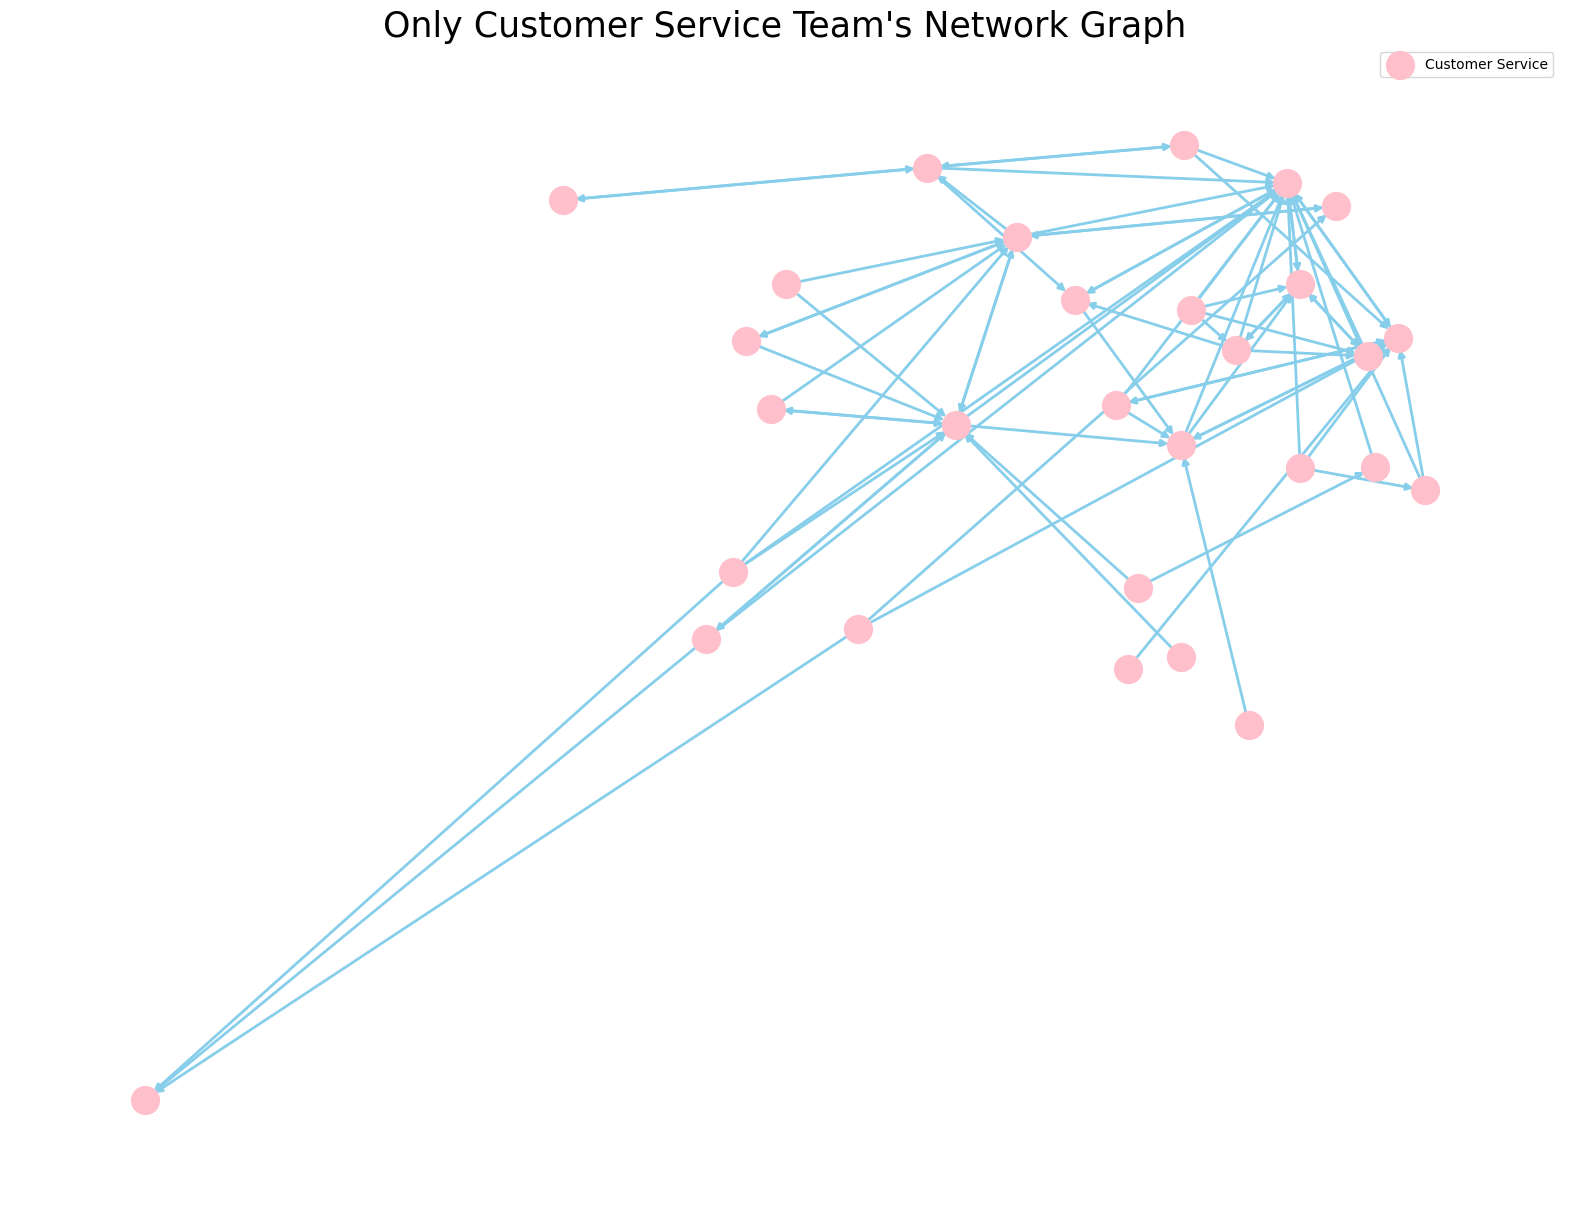

In [98]:
only_cs_team = only_team(only_cus, OCG, 'Customer Service', pinknodes, 'pink')
only_cs_team

Network Connection within Engineering Team

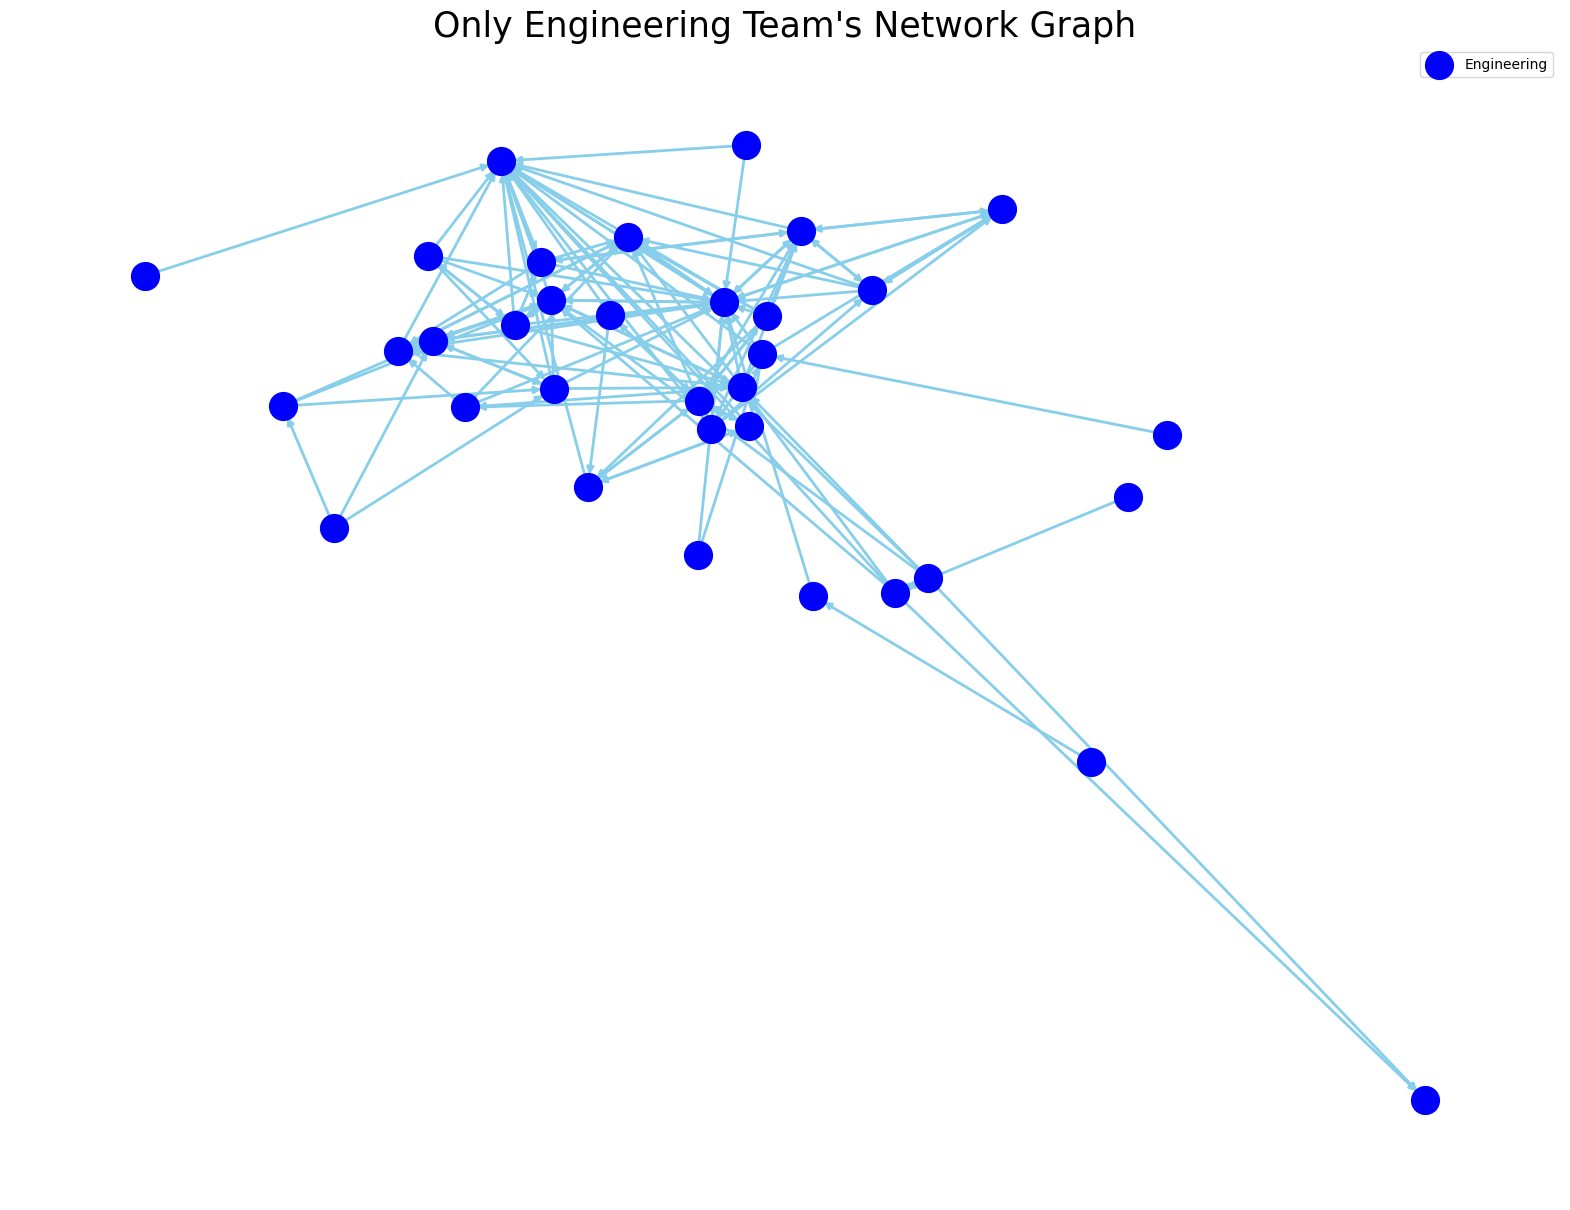

In [99]:
only_eng_team = only_team(only_eng, OEG, 'Engineering', bluenodes, 'blue')
only_eng_team

Network Connection within Marketing Team

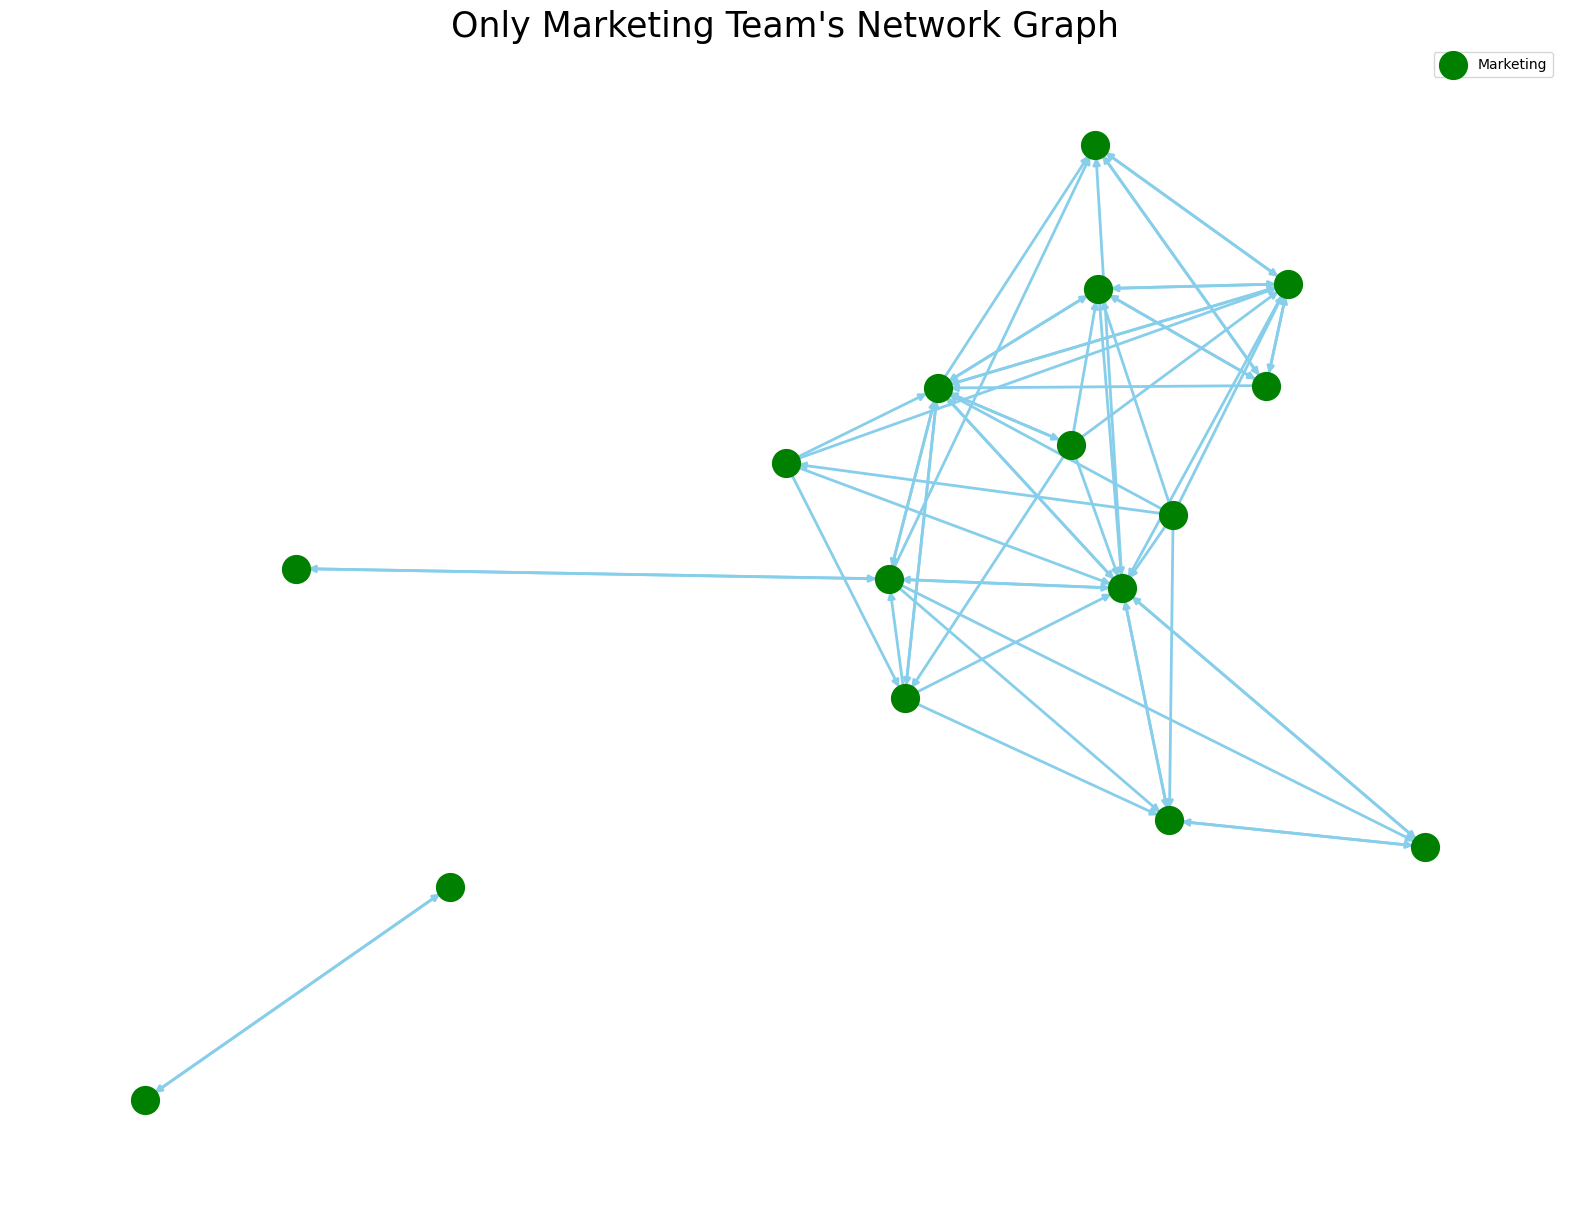

In [100]:
only_mkt_team = only_team(only_mkt, OMG, 'Marketing', greennodes, 'green')
only_mkt_team

Network Connection within Product Merchandishing Team

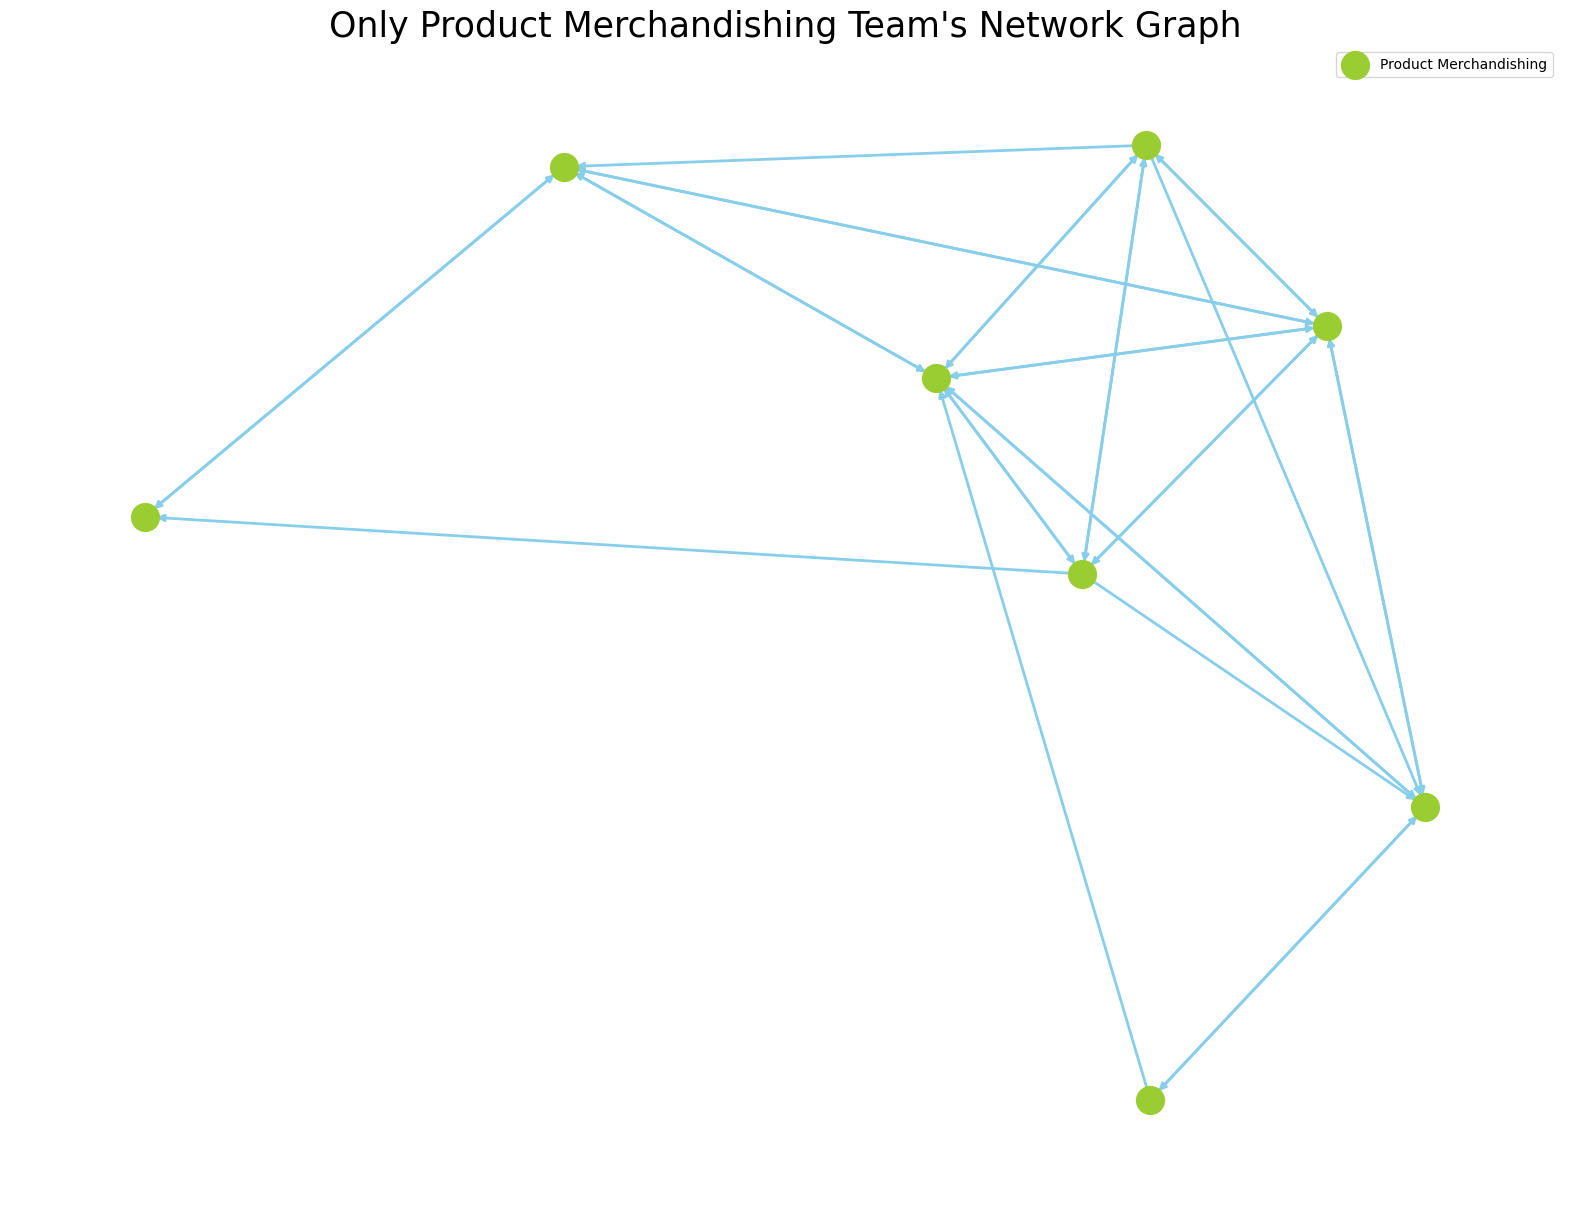

In [101]:
only_pm_team = only_team(only_pm, OPG, 'Product Merchandishing', yellowgreennodes, 'yellowgreen')
only_pm_team

Network Connection within Sales Team

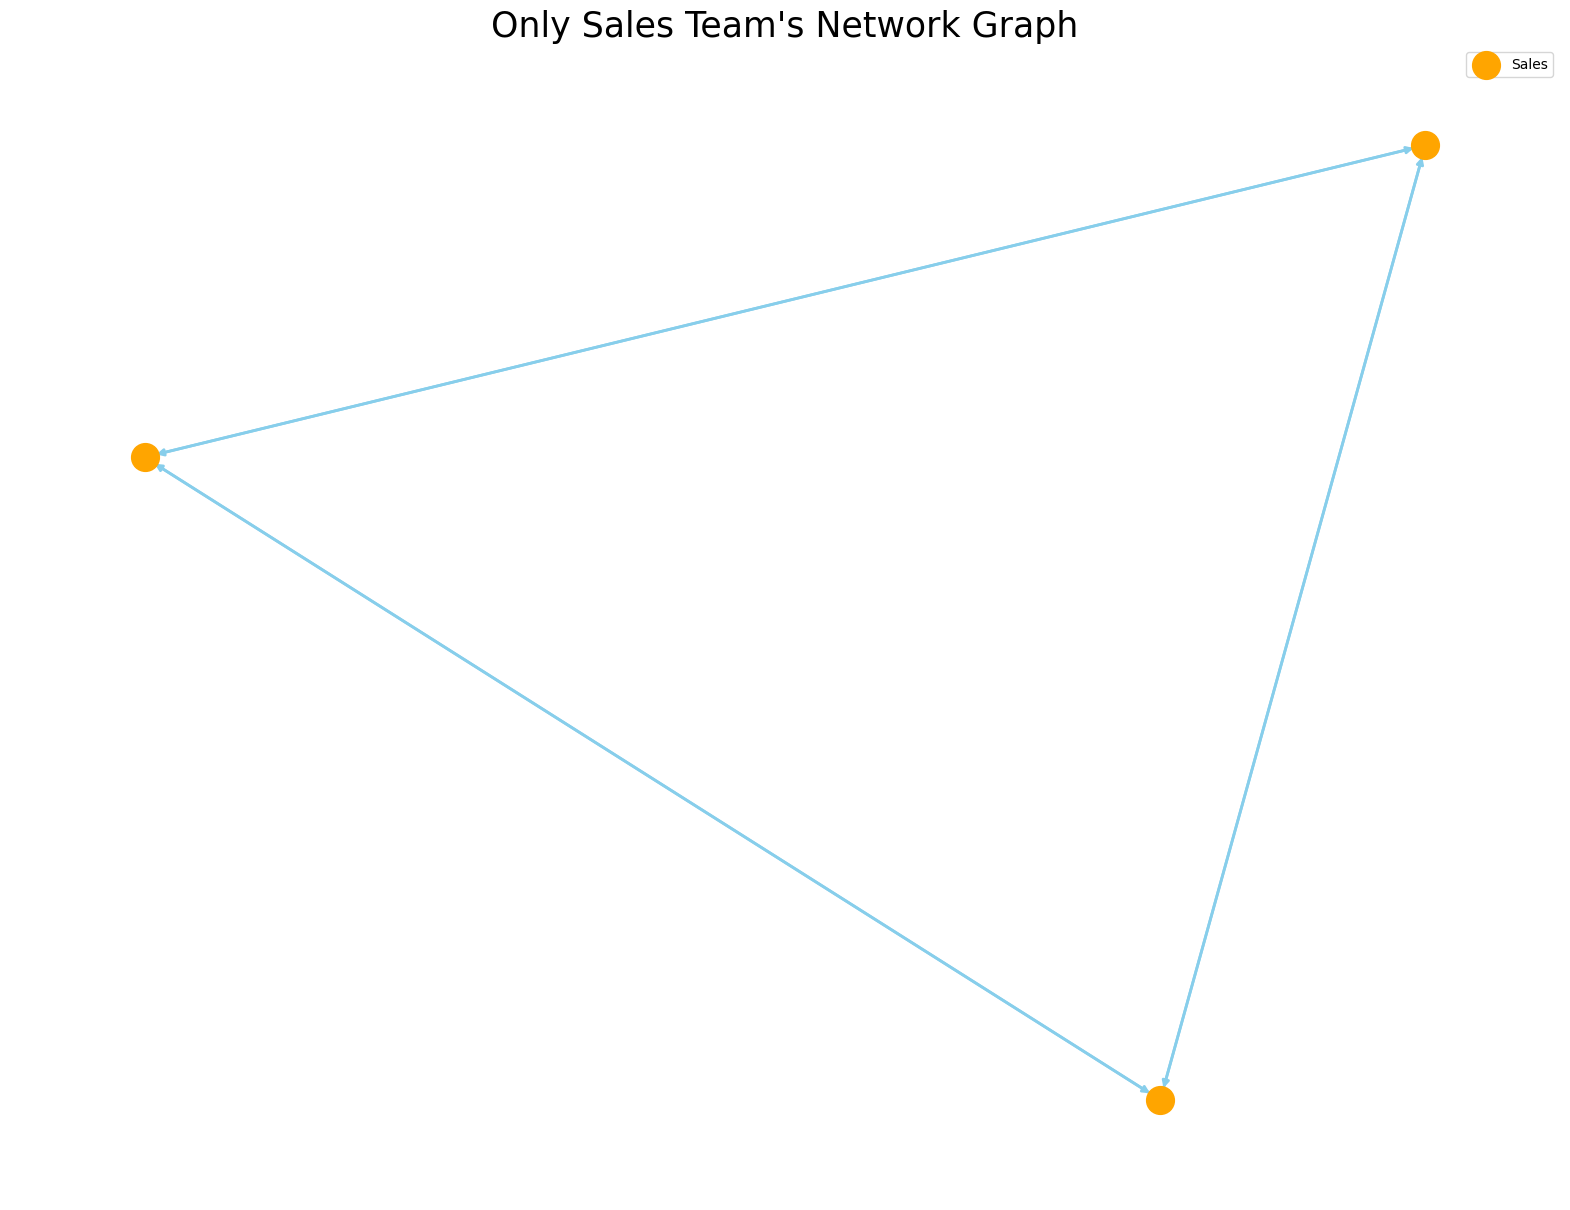

In [102]:
only_sales_team = only_team(only_sales, OSG, 'Sales', orangenodes, 'orange')
only_sales_team

#### Team Comparison in aspect of the the network metrics:

* Global Efficiency
* The Ratio of Internal to External communication: Silo Signature and Innovation Signature
* Density
* Diameter
* clustering coefficient

##### Team's global efficiency

The global efficiency of a network is a scaled measure that ranges from 0–1, with a value of 1 indicating maximum global efficiency. It's defined as the average of inverse distances between all pairs of vertices in a network, where the inverse distance between pairs that are not reachable from each other is considered to be zero.

In [103]:

G_list = [CSG, EG, MG, PG, SG]

team_compare = pd.DataFrame()
team_compare['Team'] = ['Customer Service - Spoonflower','Engineering - Spoonflower',
                        'Marketing - Spoonflower', 'Product Merchandising - Spoonflower',
                        'Sales - Spoonflower']
nnodes = []
ndegrees = []
avgnodes = []
avglenghs =[]


for i in G_list:
    num_n = i.number_of_nodes()
    nnodes.append(num_n)

    num_e = i.number_of_edges()
    ndegrees.append(num_e)

    avg_n = np.mean([d for _, d in i.degree()])
    avgnodes.append(avg_n)

    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(i))
    average_path_lengths = [
        np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
        ]
    overall_avg = np.mean(average_path_lengths)
    avglenghs.append(overall_avg)
    
    
team_compare['Number of Team Member'] = [29, 34, 16, 8, 3]
team_compare['Number of Nodes'] = nnodes
team_compare['Number of Edges'] = ndegrees
team_compare['Avg Nodes'] = avgnodes
team_compare['Avg Lenghs'] = avglenghs

team_compare

Team  Number of Team Member  \
0       Customer Service - Spoonflower                     29   
1            Engineering - Spoonflower                     34   
2              Marketing - Spoonflower                     16   
3  Product Merchandising - Spoonflower                      8   
4                  Sales - Spoonflower                      3   

   Number of Nodes  Number of Edges  Avg Nodes  Avg Lenghs  
0               74              171   4.621622    1.096963  
1               79              203   5.139241    1.551364  
2               49              143   5.836735    1.846630  
3               44              109   4.954545    1.756061  
4               24               35   2.916667    1.465675

#### The Ratio of Internal to External communication

In [104]:

inte = [OCG, OEG, OMG, OPG, OSG]
exte = [CSG, EG, MG, PG, SG]
ratio = []
for i, j in zip(inte, exte):
    external = j.number_of_edges() - i.number_of_edges()
    edge_ratio = i.number_of_edges()/external
    ratio.append(edge_ratio) 
team_compare['edges Ratio'] = ratio
team_compare

Team  Number of Team Member  \
0       Customer Service - Spoonflower                     29   
1            Engineering - Spoonflower                     34   
2              Marketing - Spoonflower                     16   
3  Product Merchandising - Spoonflower                      8   
4                  Sales - Spoonflower                      3   

   Number of Nodes  Number of Edges  Avg Nodes  Avg Lenghs  edges Ratio  
0               74              171   4.621622    1.096963     0.762887  
1               79              203   5.139241    1.551364     1.537500  
2               49              143   5.836735    1.846630     0.702381  
3               44              109   4.954545    1.756061     0.362500  
4               24               35   2.916667    1.465675     0.206897

#### Team Performance Metric

* Internal Density: We compute the density of the subgraph formed by the team members. This captures the level of interconnectedness within the team.
* bwtween team Density: We compute the density of the subgraph formed by the team members. This captures the level of interconnectedness within and bwtween the team.
* External Range: We count the unique external connections each team member has outside the team. This measures how well team members can reach out to external experts.

In [105]:

inte = [OCG, OEG, OMG, OPG, OSG]
exte = [CSG_sf, EG_sf, MG_sf, PG_sf, SG_sf]
s_exte = [CSG, EG, MG, PG, SG]

density_w = []
density_bw = []
density_shu = []

for j in inte:
    den= nx.density(j)
    density_w.append(den)

for j in exte:
    den= nx.density(j)
    density_bw.append(den)

for j in s_exte:
    den= nx.density(j)
    density_shu.append(den)



team_compare['Density within T'] = density_w
team_compare['Density between SP'] = density_bw
team_compare['Density between SH'] = density_shu
team_compare

Team  Number of Team Member  \
0       Customer Service - Spoonflower                     29   
1            Engineering - Spoonflower                     34   
2              Marketing - Spoonflower                     16   
3  Product Merchandising - Spoonflower                      8   
4                  Sales - Spoonflower                      3   

   Number of Nodes  Number of Edges  Avg Nodes  Avg Lenghs  edges Ratio  \
0               74              171   4.621622    1.096963     0.762887   
1               79              203   5.139241    1.551364     1.537500   
2               49              143   5.836735    1.846630     0.702381   
3               44              109   4.954545    1.756061     0.362500   
4               24               35   2.916667    1.465675     0.206897   

   Density within T  Density between SP  Density between SH  
0          0.091133            0.055042            0.031655  
1          0.109626            0.064314            0.032944  
2          0.245833            0.097598            0.060799  
3          0.517857            0.075075            0.057611  
4          1.000000            0.084795            0.063406

In [106]:
def compute_external_range(G, team_members):
    """
    Compute the external range of a team within a graph.
    G: NetworkX graph
    team_members: List of nodes representing the team members
    """
    external_connections = set()
    for member in team_members:
        for neighbor in G.neighbors(member):
            if neighbor not in team_members:
                external_connections.add(neighbor)
    return len(external_connections)

In [107]:
lists_t = [cs_members, eng_members, mkt_members, pm_members, s_members]
external_r = []
for i in lists_t:
    ranges = compute_external_range(CG, i)
    external_r.append(ranges)
team_compare['External Range'] = external_r

#### Clustering Effects

The clustering coefficient of a node is defined as the probability that two randomly selected employees of nodes are connected with each other. As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes. The closer the average clustering coefficient is to 1, the more complete the network graph will be because there’s just one giant component. Moreover, it is a sign of triadic closure because the more complete the graph is, the more triangles will usually occur.

In [108]:
cluster_w = []
cluster_bw = []

for j in inte:
    clus= nx.average_clustering(j)
    cluster_w.append(clus)

for j in exte:
    clus= nx.average_clustering(j)
    cluster_bw.append(clus)

team_compare['Clustering within Team'] = cluster_w
team_compare['Clustering between Teams'] = cluster_bw
team_compare

Team  Number of Team Member  \
0       Customer Service - Spoonflower                     29   
1            Engineering - Spoonflower                     34   
2              Marketing - Spoonflower                     16   
3  Product Merchandising - Spoonflower                      8   
4                  Sales - Spoonflower                      3   

   Number of Nodes  Number of Edges  Avg Nodes  Avg Lenghs  edges Ratio  \
0               74              171   4.621622    1.096963     0.762887   
1               79              203   5.139241    1.551364     1.537500   
2               49              143   5.836735    1.846630     0.702381   
3               44              109   4.954545    1.756061     0.362500   
4               24               35   2.916667    1.465675     0.206897   

   Density within T  Density between SP  Density between SH  External Range  \
0          0.091133            0.055042            0.031655              43   
1          0.109626            0.064314            0.032944              42   
2          0.245833            0.097598            0.060799              20   
3          0.517857            0.075075            0.057611              21   
4          1.000000            0.084795            0.063406              11   

   Clustering within Team  Clustering between Teams  
0                0.333924                  0.231532  
1                0.370830                  0.301935  
2                0.440438                  0.320788  
3                0.596806                  0.412556  
4                1.000000                  0.163428

In [109]:

def cluster_hist(G, name):
    plt.figure(figsize= (8, 6))
    plt.hist(nx.clustering(G).values(), bins=50, label=str(name))
    plt.title("Clustering Coefficient Histogram - " + str(name), fontdict={"size": 15})
    plt.xlabel("Clustering Coefficient", fontdict={"size": 12})
    plt.ylabel("Counts", fontdict={"size": 12})
    plt.legend()
    return plt.show()

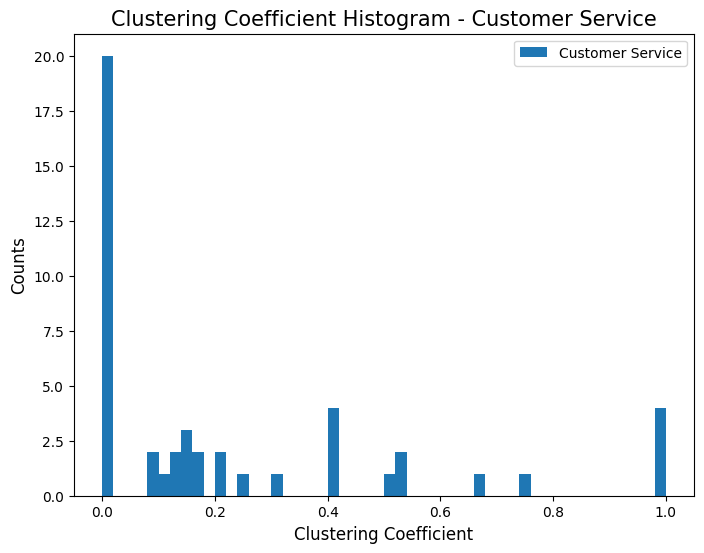

In [110]:
cs_clueff = cluster_hist(CSG_sf, 'Customer Service')
cs_clueff

#### Customer Service Team Clustering Coefficient:


 50 bins were used to showcase the distribution. The bin with the highest counts concerns nodes with clustering coefficient close to 0.02 as there are 20 nodes in that bin. In addition, the bins of clustering coefficient between 0.0 and 0.4 contain the majority of nodes by far. It seems like that only 5 nodes has clustering coefficient near 1.0.



##### Creating a function that returns the new dataframe containing different centrality values for each observation at team level

In [111]:
def centrality_dataframe(Graph):

    # Degree------------------------------------------------------------------
    connections = dict(Graph.degree)
    # Degree centrality value-------------------------------------------------
    degree_team = nx.degree_centrality(Graph)
    # closeness centrality value----------------------------------------------
    closeness_team = nx.closeness_centrality(Graph)
    # betweeness centrality value---------------------------------------------
    betweeness_team = nx.betweenness_centrality(Graph)
    # Eigenvector Centrality value--------------------------------------------
    eigen_team = nx.eigenvector_centrality(Graph)
    #PageRank Centrality value -----------------------------------------------
    pgrn_team = nx.pagerank(Graph, alpha=0.9)

    # Normalising the values--------------------------------------------------
    max_val_deg = max(degree_team.items(), key=lambda item: item[1])
    max_val_close = max(closeness_team.items(), key=lambda item: item[1])
    max_val_between = max(betweeness_team.items(), key=lambda item: item[1])
    max_val_eigen = max(eigen_team.items(), key=lambda item: item[1])
    max_val_pgrn = max(pgrn_team.items(), key = lambda item:item[1])

    # Creating empty dictionaries
    deg_scaled ={}
    close_scaled ={}
    between_scaled={}
    eigen_scaled ={}
    pagerank_scaled={}

    for key in eigen_team.keys():
        deg_scaled[key] = degree_team[key]/max_val_deg[1]
        close_scaled[key] = closeness_team[key]/max_val_close[1]
        between_scaled[key] = betweeness_team[key]/max_val_between[1]
        eigen_scaled[key] = eigen_team[key]/max_val_eigen[1]
        pagerank_scaled[key] = pgrn_team[key]/max_val_pgrn[1]


    # Creating dataframe of number of connections-------------------------------
    df=pd.DataFrame.from_dict(connections.items())
    df.columns=["Employee ID", "Connections"]
    # Creating dataframe of degree centrality-----------------------------------
    df1=pd.DataFrame.from_dict(deg_scaled.items())
    df1.columns=["Employee ID", "Degree"]
    # Creating dataframe of closeness centrality--------------------------------
    df2=pd.DataFrame.from_dict(close_scaled.items())
    df2.columns=["Employee ID", "Closeness"]
    # Creating dataframe of Betweeness centrality-------------------------------
    df3=pd.DataFrame.from_dict(between_scaled.items())
    df3.columns=["Employee ID", "Betweenness"]
    # Creating dataframe of Eigenvector centrality------------------------------
    df4=pd.DataFrame.from_dict(eigen_scaled.items())
    df4.columns=["Employee ID", "Eigenvector"]
     # Creating dataframe of PageRank centrality------------------------------
    df5=pd.DataFrame.from_dict(pagerank_scaled.items())
    df5.columns=["Employee ID", "PageRank"]


    # merging all the dataframes------------------------------------------------
    data = [df1, df2,df3,df4, df5]

    for dataframe in data:
        df = df.merge(dataframe, on="Employee ID")
        
    return df

##### Combining centrality dataframe with the organization's hr employee data.

In [112]:
def centrality_team(G, name):
    centrality_emp = centrality_dataframe(G)
    emp=hr_df.copy()
    centrality_employees = emp.merge(centrality_emp, on='Employee ID')
    # Selecting only people who are in the customer serveice team
    centrality_team = centrality_employees[
        centrality_employees['Business Unit level 2'] == str(name)].reset_index(drop=True)
    return centrality_team

In [113]:
# Customer service team's centrality measurements results

centrality_cs_team = centrality_team(CSG_sf, 'Customer Service - Brand 2')
centrality_cs_team.head()

Employee ID On Site Frequency                          Position Title  \
0      2003109      Fully Remote  Lead Customer Service Representative 5   
1      2002435      Fully Remote       Customer Service Representative 3   
2      2002910            Hybrid       Customer Service Representative 4   
3      2002936            Hybrid       Customer Service Representative 4   
4      2003171      Fully Remote       Customer Service Representative 4   

  Date in service Business Unit level 1       Business Unit level 2 team_abr  \
0      2021-01-25               Brand 2  Customer Service - Brand 2    CS_B2   
1      2020-09-03               Brand 2  Customer Service - Brand 2    CS_B2   
2      2020-05-26               Brand 2  Customer Service - Brand 2    CS_B2   
3      2020-08-10               Brand 2  Customer Service - Brand 2    CS_B2   
4      2021-07-19               Brand 2  Customer Service - Brand 2    CS_B2   

   Connections    Degree  Closeness  Betweenness   Eigenvector  PageRank  
0            5  0.185185   0.043704     0.078759  2.322038e-24  0.089780  
1            2  0.074074   0.000000     0.000000  5.805094e-26  0.047253  
2            7  0.259259   0.058273     0.025060  4.533779e-23  0.067453  
3            7  0.259259   0.208929     0.109785  7.576069e-06  0.083264  
4            2  0.074074   0.000000     0.000000  5.805094e-26  0.047253

In [114]:
# Engineering team's centrality measurements results

centrality_eng_team = centrality_team(EG_sf, 'Engineering - Brand 2')
centrality_eng_team.head()

Employee ID On Site Frequency                           Position Title  \
0      3022906      Fully Remote     Sr. Software Development Engineer II   
1      3023646      Fully Remote                    Product Specialist II   
2      3038672            Hybrid                      Sr. Data Engineer I   
3      2002909            Hybrid       Sr. Principal Designer - UX Design   
4      2003144            Hybrid  Principal Software Development Engineer   

  Date in service Business Unit level 1  Business Unit level 2 team_abr  \
0      2022-07-18             Corporate  Engineering - Brand 2   ENG_B2   
1      2022-08-01             Corporate  Engineering - Brand 2   ENG_B2   
2      2023-09-18             Corporate  Engineering - Brand 2   ENG_B2   
3      2015-11-18             Corporate  Engineering - Brand 2   ENG_B2   
4      2014-06-23             Corporate  Engineering - Brand 2   ENG_B2   

   Connections   Degree  Closeness  Betweenness   Eigenvector  PageRank  
0            1  0.03125   0.000000     0.000000  4.376389e-18  0.015650  
1           10  0.31250   0.444444     0.370203  3.899498e-02  0.036840  
2            9  0.28125   0.483871     0.011080  1.576635e-01  0.124079  
3           11  0.34375   0.483871     0.055949  8.861491e-02  0.055571  
4            7  0.21875   0.138889     0.002524  9.084616e-06  0.045152

In [115]:
# Marketing team's centrality measurements results

centrality_market_team = centrality_team(MG_sf, 'Marketing - Brand 2')
centrality_market_team.head()

Employee ID On Site Frequency                  Position Title  \
0      2003115            Hybrid       Social Media Specialist I   
1      2002680            Hybrid     Collaborations Specialist I   
2      3029900      Fully Remote  Sr. Manager, Channel Marketing   
3      2002934            Hybrid     Sr. Marketing Specialist II   
4      2002166            Hybrid  Partner Marketing Specialist I   

  Date in service Business Unit level 1 Business Unit level 2 team_abr  \
0      2021-03-01               Brand 2   Marketing - Brand 2   MKT_B2   
1      2020-06-16               Brand 2   Marketing - Brand 2   MKT_B2   
2      2022-11-14               Brand 2   Marketing - Brand 2   MKT_B2   
3      2013-10-16               Brand 2   Marketing - Brand 2   MKT_B2   
4      2014-09-29               Brand 2   Marketing - Brand 2   MKT_B2   

   Connections    Degree  Closeness  Betweenness   Eigenvector  PageRank  
0            2  0.071429   0.500000     0.000000  6.979125e-02  0.041298  
1            6  0.214286   0.673913     0.022559  2.975377e-01  0.230741  
2            4  0.142857   0.086111     0.201865  4.499910e-08  0.075456  
3            8  0.285714   0.626263     0.020838  2.041208e-01  0.091493  
4            4  0.142857   0.143519     0.113956  4.500184e-08  0.063298

In [116]:
# Product Merchandising team's centrality measurements results

centrality_product_team = centrality_team(PG_sf, 'Product Merchandising - Brand 2')
centrality_product_team.head()

Employee ID On Site Frequency                  Position Title  \
0      3020739      Fully Remote       Manager, Product Sourcing   
1      3043751            Hybrid     Merchandising Specialist II   
2      2002939            Hybrid     Product Sourcing Analyst II   
3      3033414      Fully Remote  Sr. Merchandising Specialist I   
4      2003018            Hybrid      Sr. Manager, Merchandising   

  Date in service Business Unit level 1            Business Unit level 2  \
0      2022-03-28               Brand 2  Product Merchandising - Brand 2   
1      2024-03-18               Brand 2  Product Merchandising - Brand 2   
2      2020-11-30               Brand 2  Product Merchandising - Brand 2   
3      2023-04-10               Brand 2  Product Merchandising - Brand 2   
4      2015-03-04               Brand 2  Product Merchandising - Brand 2   

  team_abr  Connections    Degree  Closeness  Betweenness  Eigenvector  \
0    PM_B2           11  0.379310   0.736842     0.451147     0.433210   
1    PM_B2           14  0.482759   0.666667     0.370969     0.505181   
2    PM_B2            5  0.172414   0.506024     0.238050     0.175042   
3    PM_B2           14  0.482759   0.656250     0.144296     0.511948   
4    PM_B2           27  0.931034   0.875000     0.793913     0.715083   

   PageRank  
0  0.293853  
1  0.313789  
2  0.142280  
3  0.311860  
4  0.505432

In [117]:
# Sales team's centrality measurements results

centrality_sales_team = centrality_team(SG_sf, 'Sales - Brand 2')
centrality_sales_team.head()

Employee ID On Site Frequency                 Position Title  \
0      2003112            Hybrid  Sr. Account Service Manager I   
1      3025972      Fully Remote  Sr. Account Service Manager I   
2      2003036            Hybrid                Director, Sales   

  Date in service Business Unit level 1 Business Unit level 2  team_abr  \
0      2021-05-10               Brand 2       Sales - Brand 2  Sales_B2   
1      2022-08-22               Brand 2       Sales - Brand 2  Sales_B2   
2      2021-02-15               Brand 2       Sales - Brand 2  Sales_B2   

   Connections    Degree  Closeness  Betweenness  Eigenvector  PageRank  
0            6  0.250000   0.600000     0.032389     0.542476  0.266912  
1            5  0.208333   0.580645     0.028340     0.542476  0.260865  
2           24  1.000000   1.000000     1.000000     1.000000  1.000000

In [118]:
# define a function that can sort out top 5 centrality measuremnt for each team

def five_signature(G, name):
    team = centrality_team(G, str(name))
    proactive = team.sort_values(by= 'Degree', ascending=False)[:5]
    
    central = team.sort_values(by= 'Closeness', ascending=False)[:5]
    
    connectors = team.sort_values(by= 'Betweenness', ascending=False)[:5]
    
    rich_tiers = team.sort_values(by= 'Eigenvector', ascending=False)[:5]
    
    influencer = team.sort_values(by= 'PageRank', ascending=False)[:5]
    
    return proactive, central, connectors, rich_tiers,  influencer

In [119]:
cs1, cs2, cs3, cs4, cs5 = five_signature(CSG, 'Customer Service - Brand 2')
eng1, eng2, eng3, eng4, eng5 = five_signature(EG, 'Engineering - Brand 2')
market1, market2, market3, market4, market5 = five_signature(MG, 'Marketing - Brand 2')
pm1, pm2, pm3, pm4, pm5 = five_signature(PG, 'Product Merchandising - Brand 2')
sales1, sales2, sales3, sales4, sales5 = five_signature(SG, 'Sales - Brand 2')




In [120]:
## define a function that can show bottom 5 centrality measuremnt for each team

def last_five(G, name):
    team = centrality_team(G, str(name))
    proactive = team.sort_values(by= 'Degree', ascending=False)[-5:]
    
    central = team.sort_values(by= 'Closeness', ascending=False)[-5:]
    
    connectors = team.sort_values(by= 'Betweenness', ascending=False)[-5:]
    
    rich_tiers = team.sort_values(by= 'Eigenvector', ascending=False)[-5:]
    
    influencer = team.sort_values(by= 'PageRank', ascending=False)[-5:]
    
    return proactive, central, connectors, rich_tiers,  influencer

In [121]:
market_1, market_2, market_3, market_4, market_5 = last_five(MG, 'Marketing - Brand 2')

##### Top 5 employees with high value of degree centrality in customer service team, engineering team, marketing team, product merchandising team, sales team, respectively.

In [122]:
# Top 5 employees with high value of degree centrality in customer service team
# color the background of a DataFrame in a gradient style, 
# to help visualize data more effectively by highlighting variations in values.

cs1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [123]:
# Top 5 employees with high value of degree centrality in engineering team.

eng1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [124]:
# Top 5 employees with high value of degree centrality in marketing team.

market1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [125]:
#Top 5 employees with high value of degree centrality in product merchandising team.

pm1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [126]:
# Top 5 employees with high value of degree centrality in sales team.

sales1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

##### Top 5 employees with high value of closeness centrality in each team

In [127]:
# Top 5 employees with high value of closeness centrality in customer service team.

cs2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')


In [128]:
# Top 5 employees with high value of closeness centrality in engineering team.

eng2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [129]:
# Top 5 employees with high value of closeness centrality in marketing team.

market2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [130]:
# Top 5 employees with high value of closeness centrality in product merchandising team.

pm2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')


In [131]:
# Top 5 employees with high value of closeness centrality in sales team.

sales2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

##### Top 5 employees with high value of betweenness centrality in each team

In [132]:
# Top 5 employees with high value of betweenness centrality in customer service team.

cs3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector','PageRank'], cmap='flare')

In [133]:
# Top 5 employees with high value of betweenness centrality in engineering team.

eng3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [134]:
# Top 5 employees with high value of betweenness centrality in marketing team.

market3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [135]:
# Top 5 employees with high value of betweenness centrality in product merchandising team.

pm3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')


In [136]:
# Top 5 employees with high value of betweenness centrality in sales team.

sales3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

##### Top 5 employees with high value of eiganvector centrality in each team

In [137]:
# Top 5 employees with high value of eiganvector centrality in customer service team.

cs4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [138]:
# Top 5 employees with high value of eiganvector centrality in engineering team.

eng4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector','PageRank'], cmap='flare')

In [139]:
# Top 5 employees with high value of eiganvector centrality in marketing team.

market4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [140]:
# Top 5 employees with high value of eiganvector centrality in product merchandising team.

pm4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [141]:
# Top 5 employees with high value of eiganvector centrality in sales team.

sales4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

##### Using netowrk graph to visualize different type of important people in each team

In [142]:
# defining a graph function for centrality measures result at team level

def cen_team(df, df1,df2, df3, df4, df5, G, name):
    subnodelist = list(df1['Employee ID'][:1]) + list(df2['Employee ID'][:1]) + list(df3['Employee ID'][:1]) + list(df4['Employee ID'][:1]) + list(df5['Employee ID'][:1])
    em_list = list(hr_df[hr_df['Business Unit level 2'] == str(name)]['Employee ID'])
    new_list = [x for x in em_list if x not in subnodelist]
    poslist = list(df1['Position Title'][:1]) + list(df2['Position Title'][:1]) + list(df3['Position Title'][:1]) + list(df4['Position Title'][:1]) + list(df5['Position Title'][:1])
    labels = {subnodelist[k]:poslist[k] for k in range(len(poslist))} 
    pos = nx.spring_layout(G, iterations=15, seed=1721)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis("off")
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df1['Employee ID'][:1]), ax = ax, node_size = 2000, 
                           node_color='orange', label='Degree Centrality', alpha =0.3, node_shape="*")
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df2['Employee ID'][:1]), ax = ax, node_size = 450,
                       node_color='red', label='Closeness Centrality', alpha =0.5, node_shape='>')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df3['Employee ID'][:1]), ax = ax, node_size = 200,
                       node_color='blue', label='Betweenness Centrality', alpha =0.6, node_shape='s')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df4['Employee ID'][:1]), ax = ax, node_size = 300,
                       node_color='green', label='Eigenvector Centrality',alpha =0.7, node_shape='d')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df5['Employee ID'][:1]), ax = ax, node_size = 100,
                       node_color='yellow', label='PageRank', alpha =0.8)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=new_list, ax = ax, node_size = 100,
                       node_color='skyblue', label='Others')
    nx.draw_networkx_edges(G, pos=pos, edge_color='gray',#df['relevanceScore'],
                            width=1.0)#, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G,pos=pos, labels=labels, font_weight="bold", font_size=8)
    plt.legend(scatterpoints = 1, loc='best')
    plt.title(str(name) + ' Network Graph', fontsize = 16)
    return plt.show()

The organization Customer Service Team's centrality signature distribution

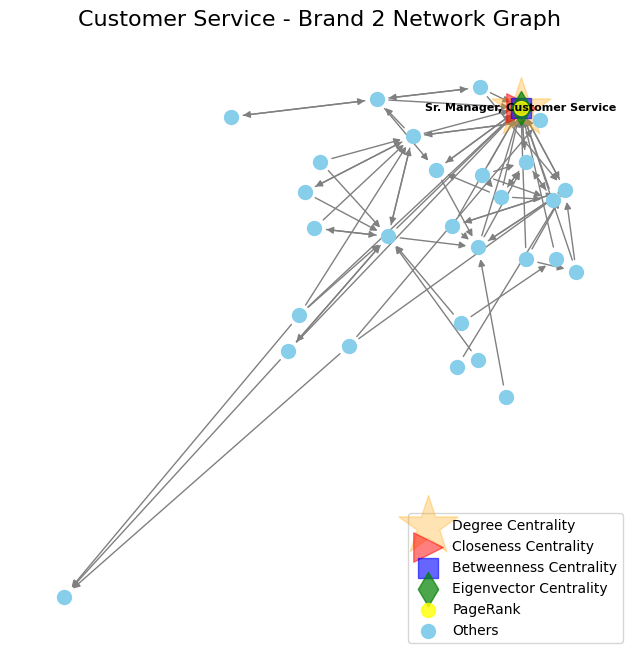

In [143]:
cen_team(only_cus, cs1, cs2, cs3, cs4, cs5, OCG, 'Customer Service - Brand 2')

The Organization Engineering Team's centrality signature distribution

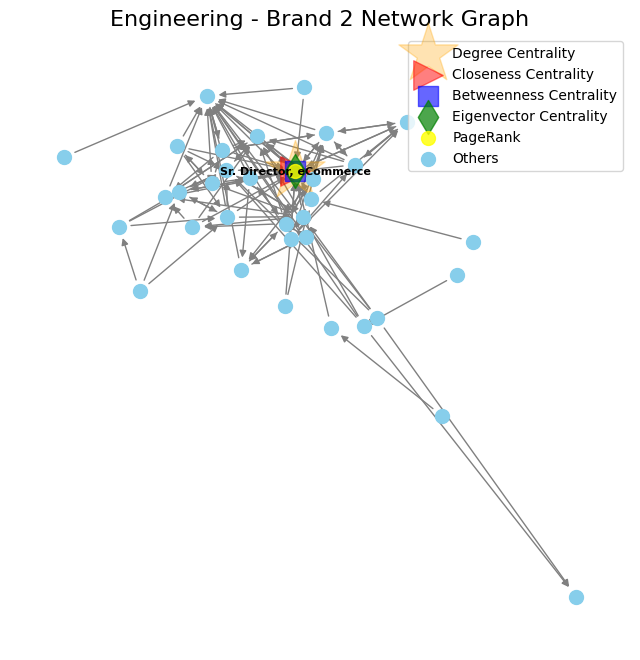

In [144]:
cen_team(only_eng, eng1, eng2, eng3, eng4, eng5, OEG, 'Engineering - Brand 2')

The Organization Marketing Team's centrality signature distribution

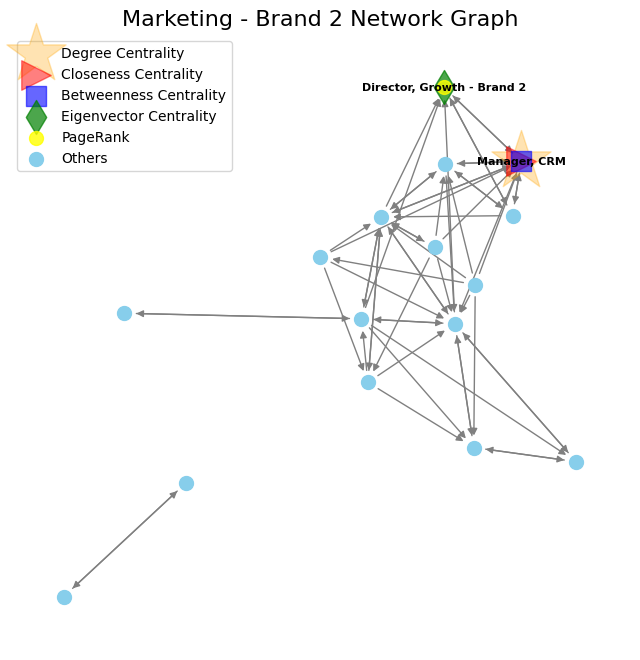

In [145]:

cen_team(only_mkt, market1, market2, market3, market4, market5, OMG, 'Marketing - Brand 2')

The Organization Product Merchandising Team's centrality signature distribution

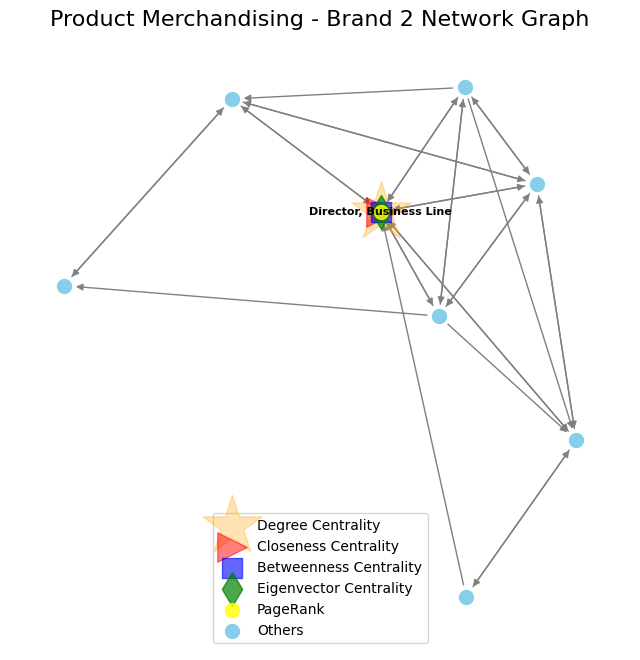

In [146]:

cen_team(only_pm, pm1, pm2, pm3, pm4, pm5, OPG, 'Product Merchandising - Brand 2')

The Organization Sales Team's centrality signature distribution

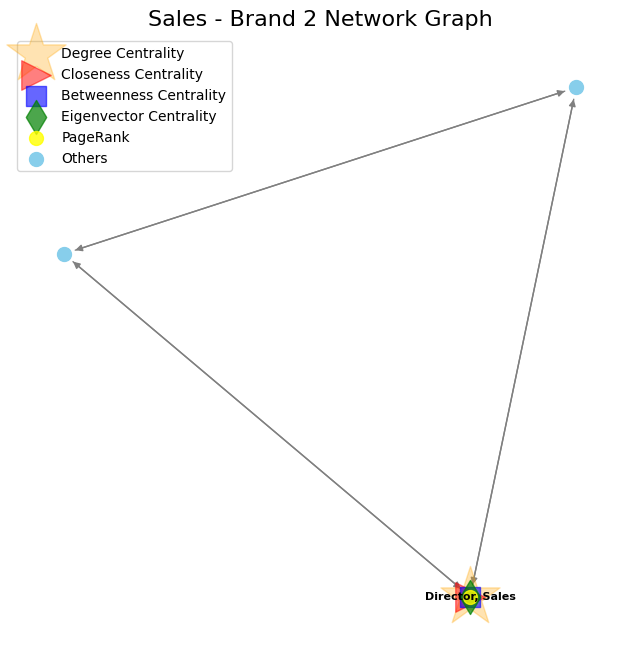

In [147]:

cen_team(only_sales, sales1, sales2, sales3, sales4, sales5, OSG, 'Sales - Brand 2')